# Retail Data Forecasting
Questions:

    Predict the department-wide sales for each store for the following year
    Model the effects of markdowns on holiday weeks
    Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


# Settup up the notebook to do the calculation

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [93]:
features = pd.read_csv('C:/Users/User/Desktop/DATA_SET/Features_data_set.csv')
sales =  pd.read_csv('C:/Users/User/Desktop/DATA_SET/sales_data_set.csv')
stores =  pd.read_csv('C:/Users/User/Desktop/DATA_SET/stores_data_set.csv')

# Date Conversion

In [94]:
features['Date'] = pd.to_datetime(features['Date'],format="%d/%m/%Y")
sales['Date'] = pd.to_datetime(sales['Date'],format="%d/%m/%Y")

In [95]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [96]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [97]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [98]:
display(features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## Creating a merged dataset - Based on Sales Data

In [99]:
# Its better to combine the dataframes into a master dataframe
# First combining features and sales data

featSaleDF = pd.merge(features,sales, on=['Store','Date','IsHoliday'],how='left')

# Now combine the stores in the dataframe featSaleDF

mergedDF = pd.merge(featSaleDF,stores, on=['Store'], how='left')

mergedDF.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,A,151315


In [100]:
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Date          423325 non-null  datetime64[ns]
 2   Temperature   423325 non-null  float64       
 3   Fuel_Price    423325 non-null  float64       
 4   MarkDown1     152433 non-null  float64       
 5   MarkDown2     112532 non-null  float64       
 6   MarkDown3     138658 non-null  float64       
 7   MarkDown4     136466 non-null  float64       
 8   MarkDown5     153187 non-null  float64       
 9   CPI           422740 non-null  float64       
 10  Unemployment  422740 non-null  float64       
 11  IsHoliday     423325 non-null  bool          
 12  Dept          421570 non-null  float64       
 13  Weekly_Sales  421570 non-null  float64       
 14  Type          423325 non-null  object        
 15  Size          423

# MISSING VALUES

In [101]:
# Check for missing values and count them
missing_values_count = mergedDF.isnull().sum()

# Print the count of missing values
display("Number of missing values in each column:")
display(missing_values_count)

'Number of missing values in each column:'

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday            0
Dept              1755
Weekly_Sales      1755
Type                 0
Size                 0
dtype: int64

# Visualizing the data after merging

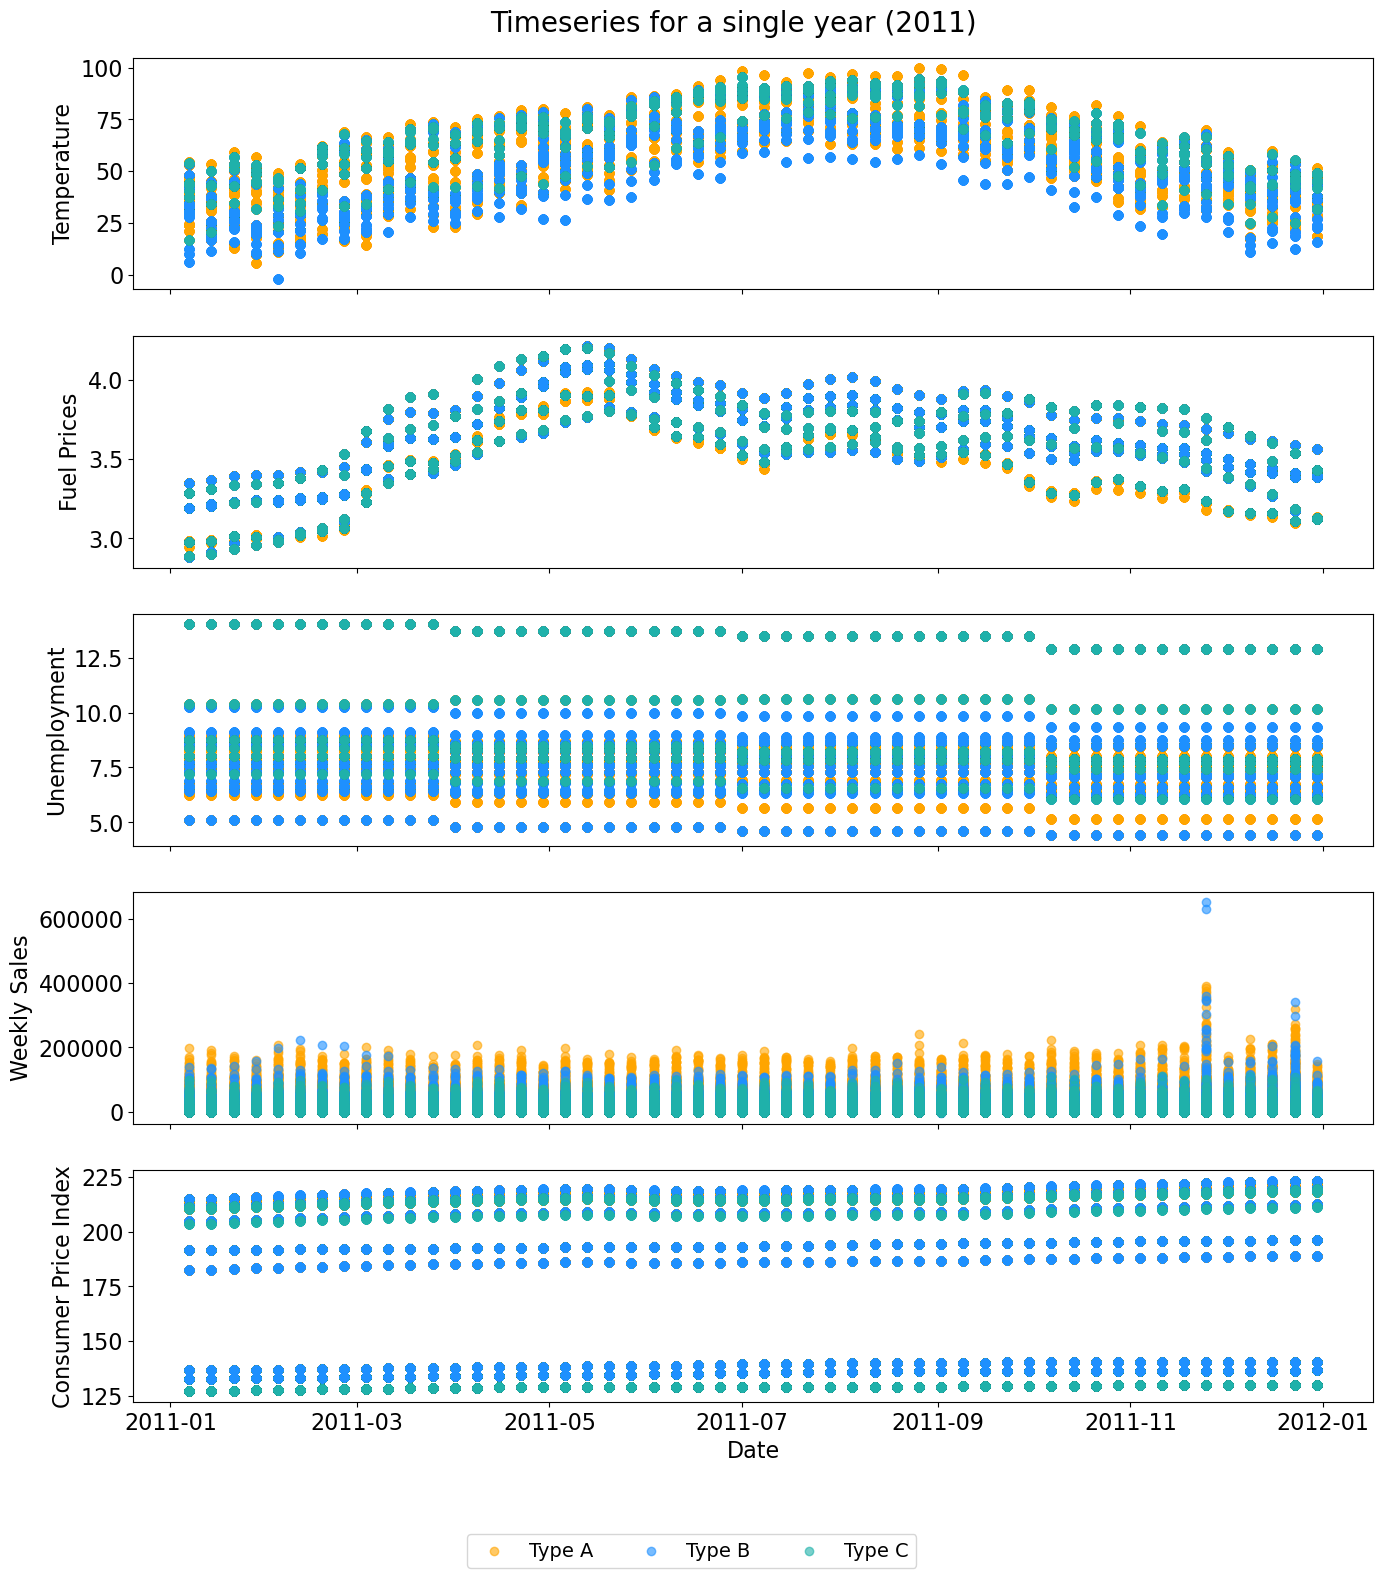

In [102]:
# Filter the DataFrame for the year 2011
df_2011 = mergedDF[mergedDF['Date'].dt.year == 2011]

# Create a single column subplot with shared x-axis
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Define the color mapping for different types
color_mapping = {'A': 'orange', 'B': 'dodgerblue', 'C': 'lightseagreen'}

# Iterate over each type and add a scatter plot for each
for typ in df_2011['Type'].unique():
    filtered_data = df_2011[df_2011['Type'] == typ]
    for ax, column, ylabel in zip(axes, 
                                  ['Temperature', 'Fuel_Price', 'Unemployment', 'Weekly_Sales', 'CPI'],
                                  ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'Consumer Price Index']):
        ax.scatter(filtered_data['Date'], filtered_data[column], 
                   color=color_mapping[typ], alpha=0.6, label=f'Type {typ}')
        ax.set_ylabel(ylabel, fontsize=16)


# Set labels and adjust fontsize
for ax in axes:
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)

axes[-1].set_xlabel('Date', fontsize=16)

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(df_2011['Type'].unique()), fontsize=14)

# Adjust layout
fig.subplots_adjust(top=0.95)  # Adjust top to make room for title

fig.suptitle('Timeseries for a single year (2011)',fontsize=20)

plt.show()

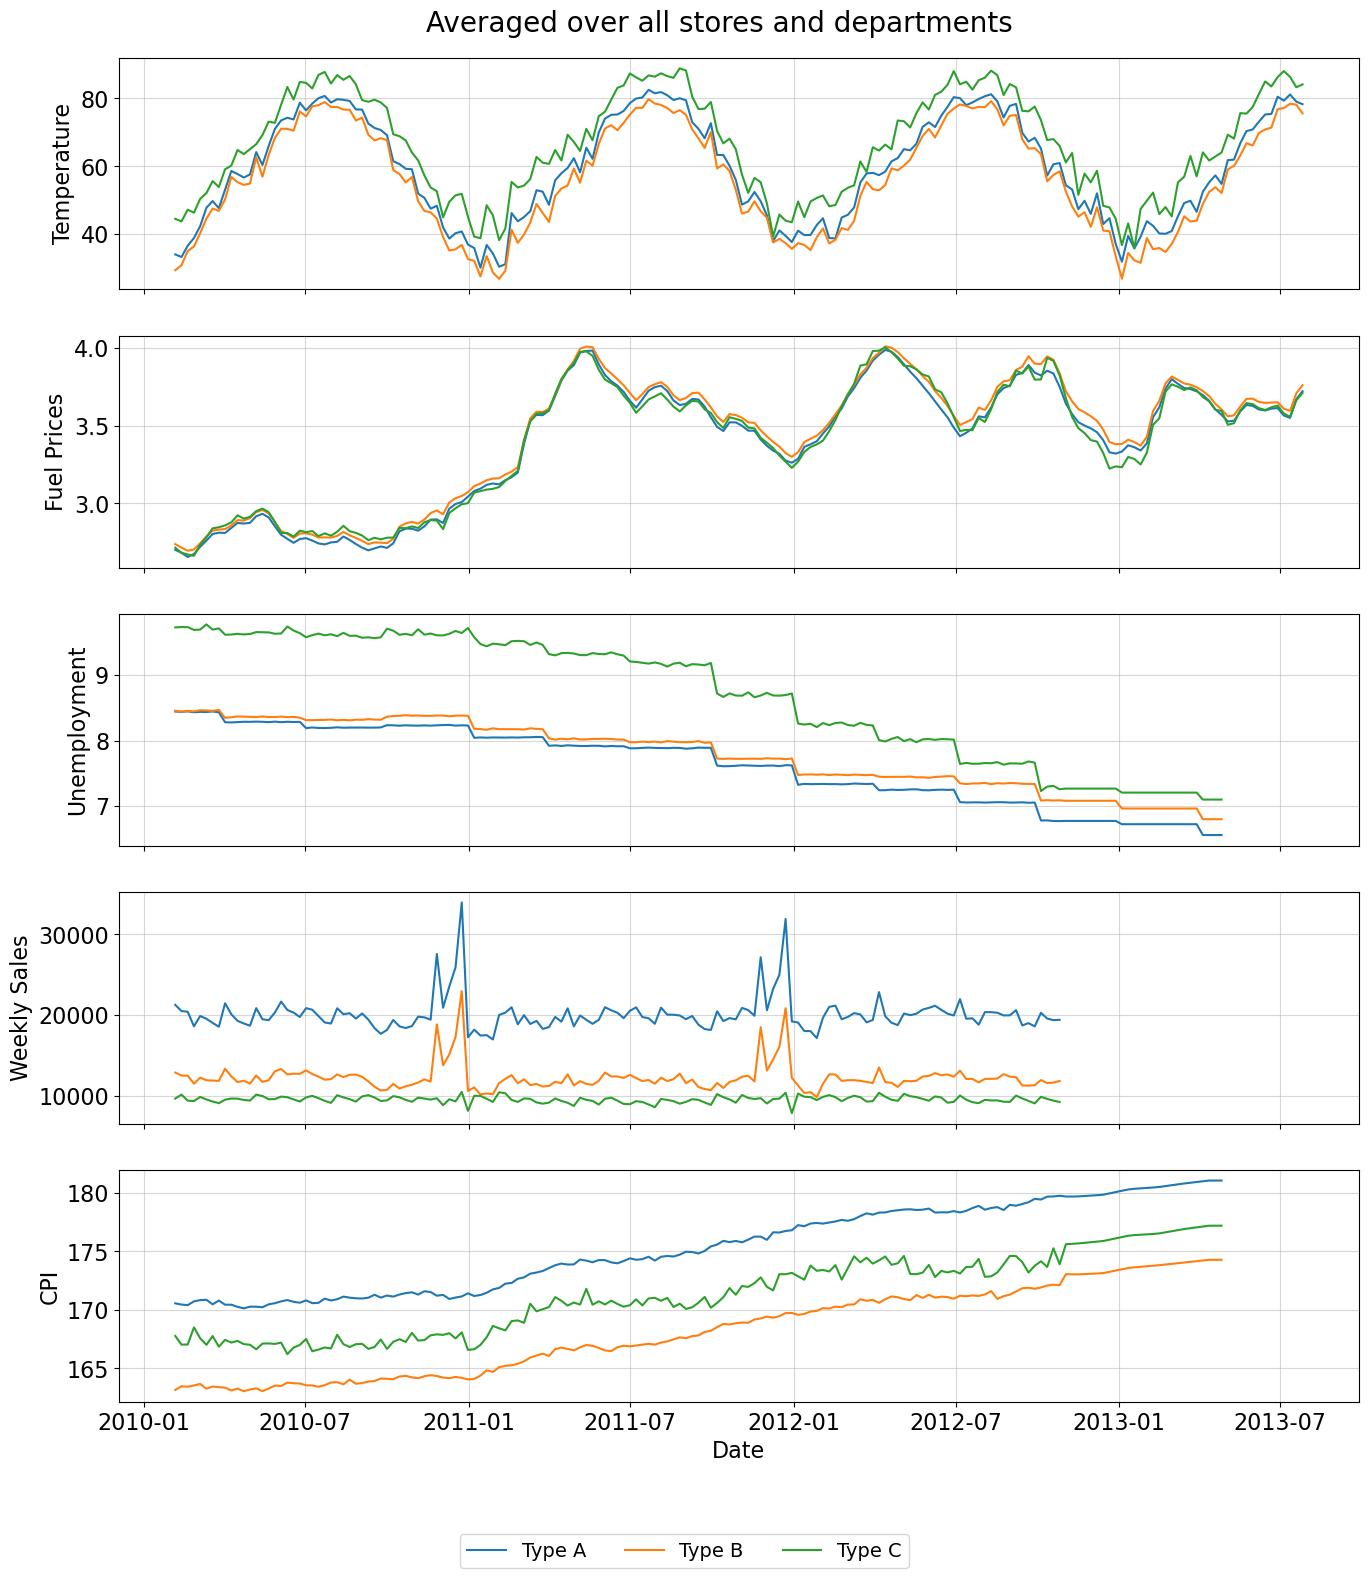

In [103]:
# Group by 'Type' and 'Date' and calculate the mean for each group
grouped_data = mergedDF.groupby(['Type', 'Date']).mean()

# Create a single column subplot with shared x-axis
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Plotting time series for each variable and type
for typ in mergedDF['Type'].unique():
    axes[0].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Temperature'], label=f'Type {typ}')
    axes[1].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Fuel_Price'], label=f'Type {typ}')
    axes[2].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Unemployment'], label=f'Type {typ}')
    axes[3].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Weekly_Sales'], label=f'Type {typ}')
    axes[4].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['CPI'], label=f'Type {typ}')

# Set labels and add grid
y_labels = ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'CPI']
for ax, label in zip(axes, y_labels):
    ax.set_ylabel(label, fontsize=16)
    ax.grid(True,alpha=0.5)

axes[-1].set_xlabel('Date', fontsize=16)

# Adjusting tick parameters
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(mergedDF['Type'].unique()), fontsize=14)

# Adjust layout
fig.subplots_adjust(top=0.95)  

fig.suptitle('Averaged over all stores and departments',fontsize=20)

plt.show()

# Working on department-wide sales for each store

In [104]:
print('Number of Stores = ',len(mergedDF['Store'].unique()))
print('Number of Departments = ',len(mergedDF['Dept'].unique()))

Number of Stores =  45
Number of Departments =  82


# Summarize sales data

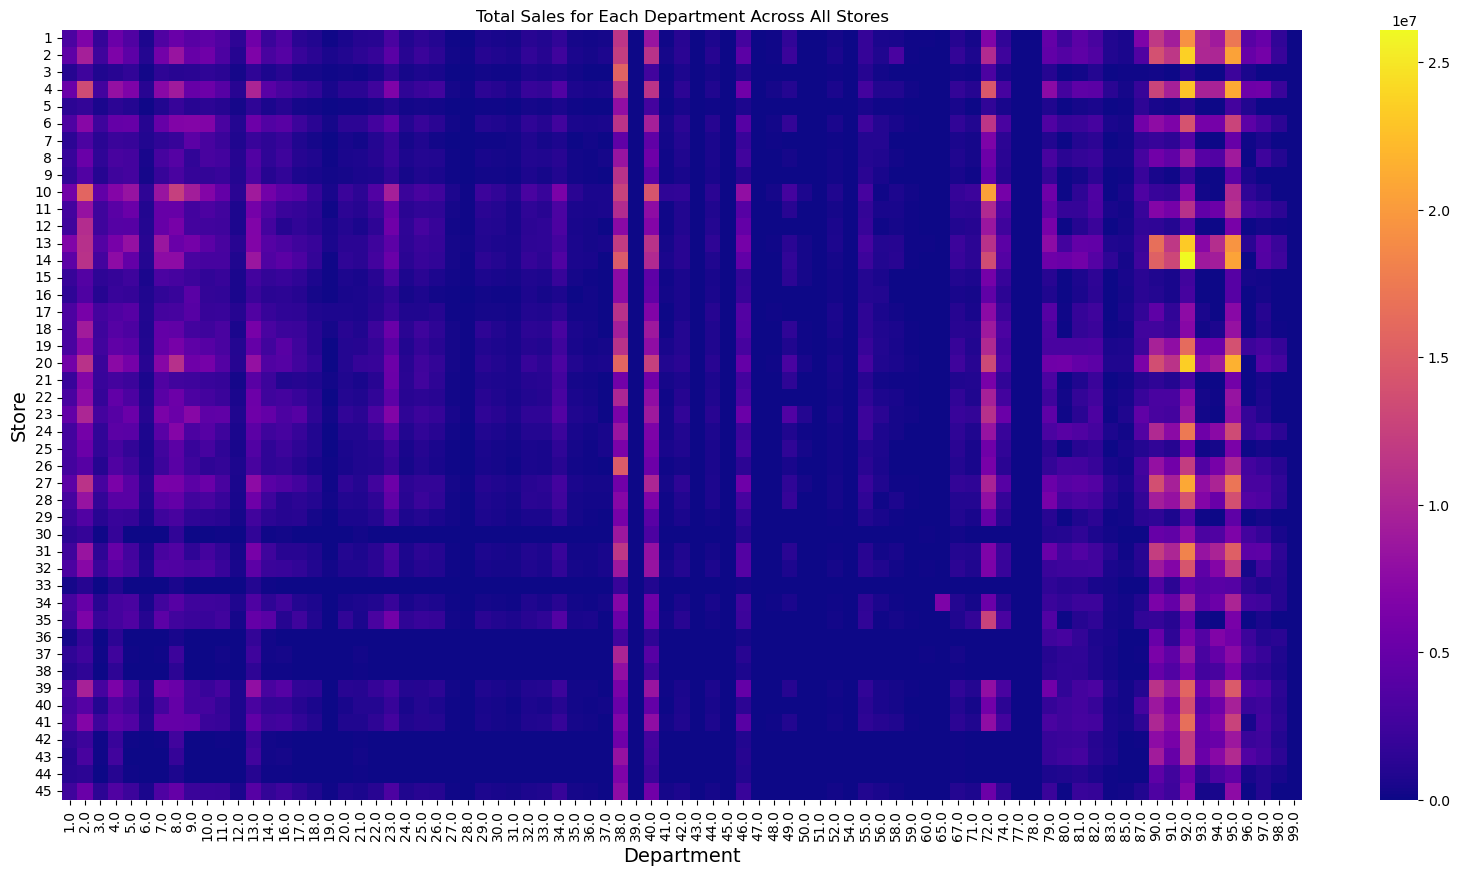

In [105]:
sales_summary = mergedDF.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().unstack()

sales_summary.fillna(0, inplace=True) # Because NaNs are no sales = 0$ value

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(sales_summary, annot=False, cmap='plasma')
plt.title('Total Sales for Each Department Across All Stores')
plt.xlabel('Department',fontsize=14)
plt.ylabel('Store',fontsize=14)
plt.show()


# The highest performing stores as of now?

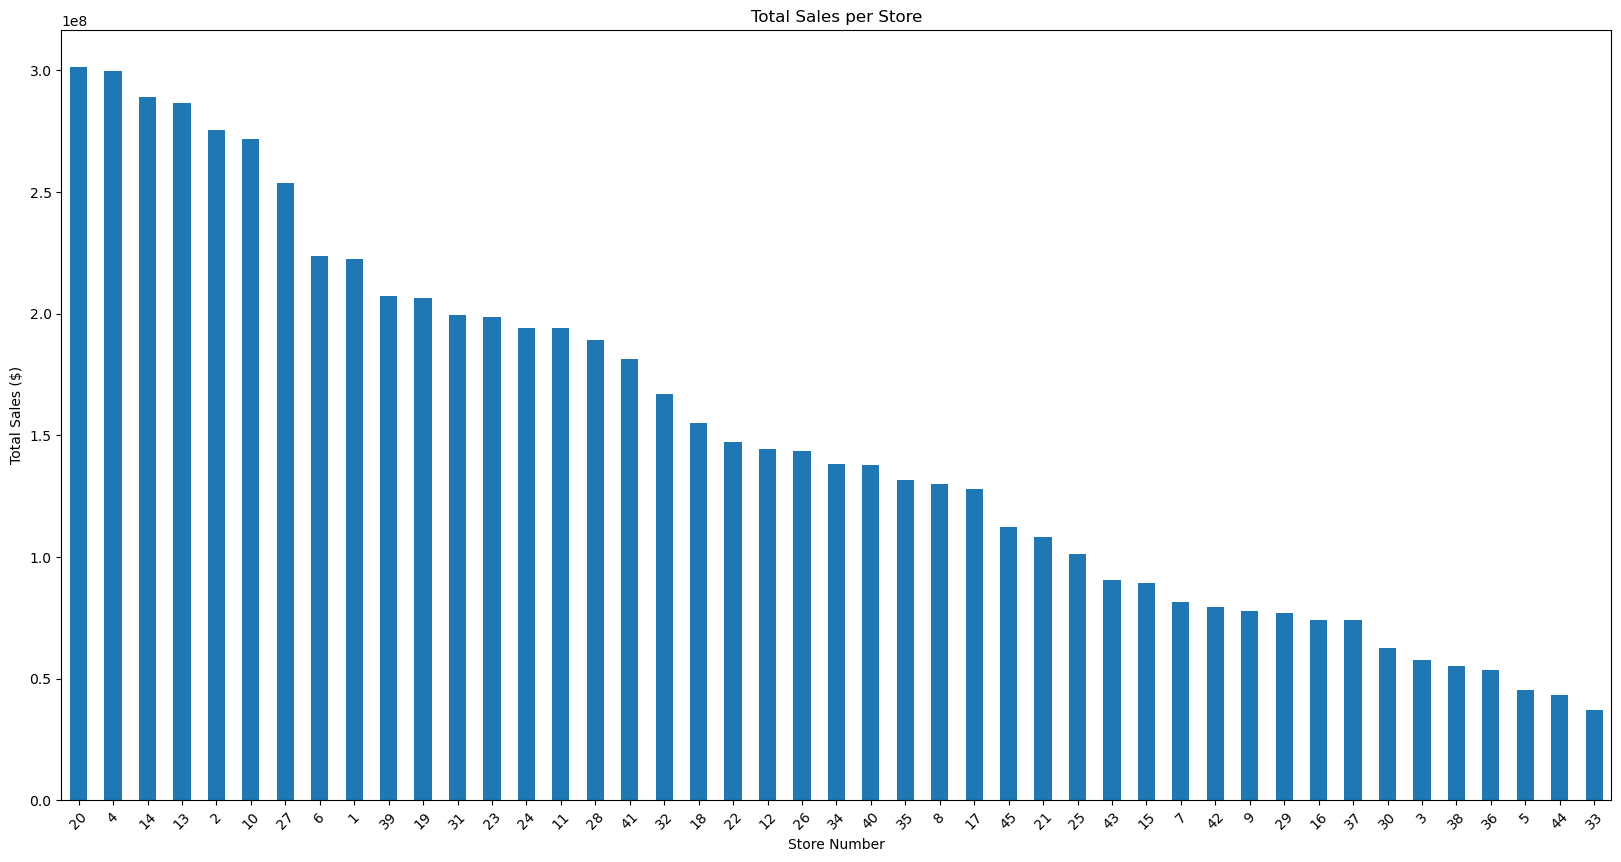

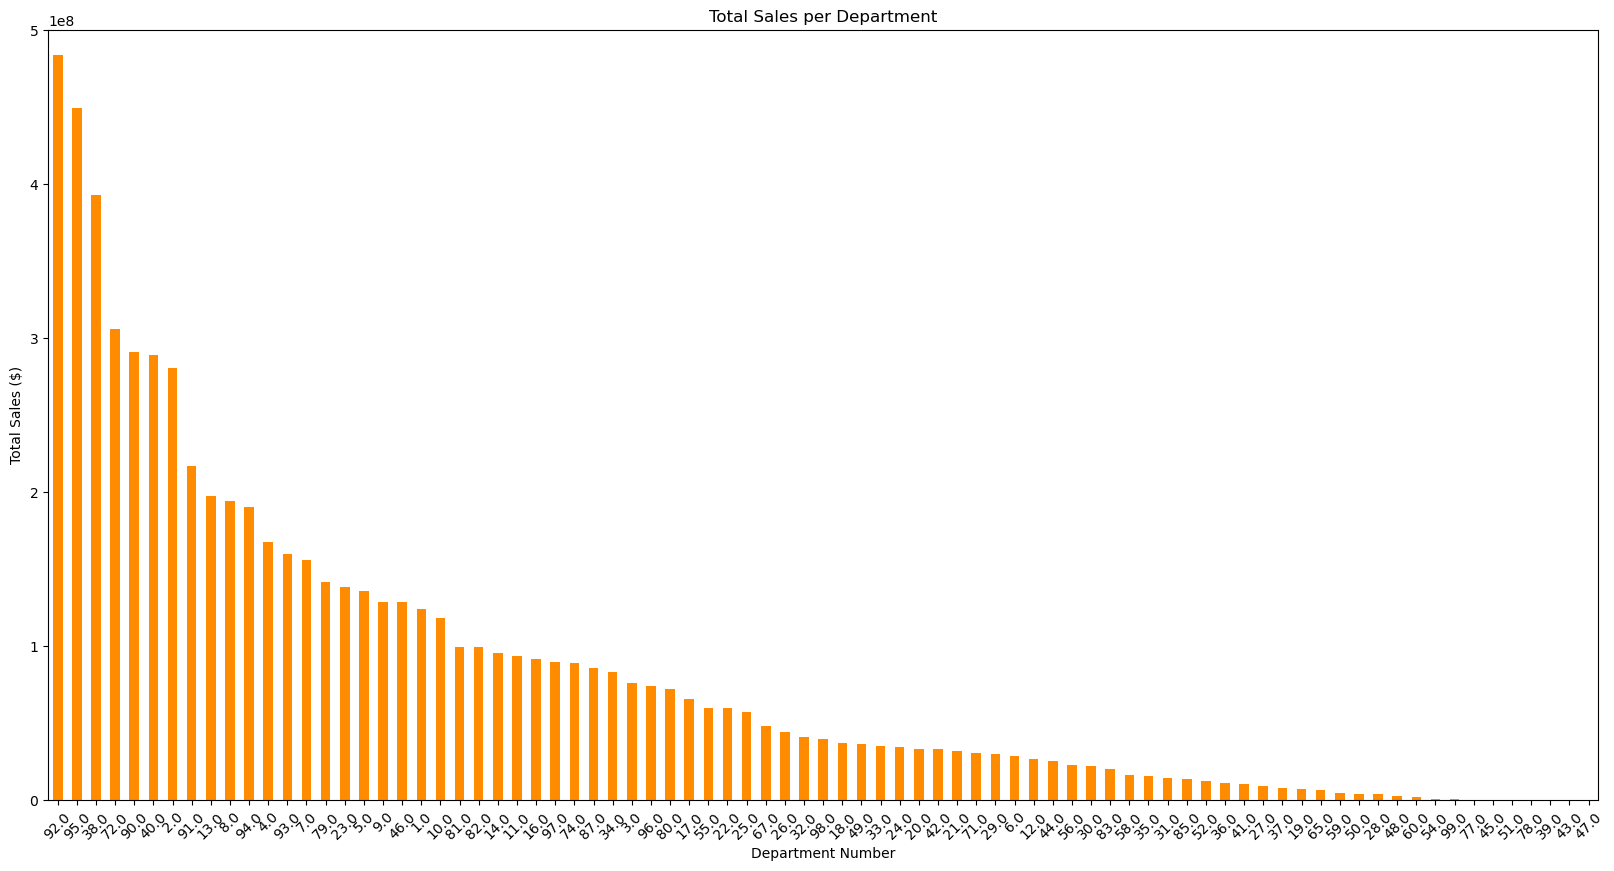

In [106]:
# Aggregate sales data at the store level
totalSales_byStore = mergedDF.groupby('Store')['Weekly_Sales'].sum()
totalSales_byDept = mergedDF.groupby('Dept')['Weekly_Sales'].sum()

# Sort the stores based on total sales in descending order
rankedStores = totalSales_byStore.sort_values(ascending=False)

# Sort the stores based on total sales in descending order
rankedDepts = totalSales_byDept.sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(20, 10))
rankedStores.plot(kind='bar')
plt.title('Total Sales per Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Creating a bar plot
plt.figure(figsize=(20, 10))
rankedDepts.plot(kind='bar',color='darkorange')
plt.title('Total Sales per Department')
plt.xlabel('Department Number')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.ylim([0,5e8])
plt.show()

In [107]:
print('Highest Performing Store  = Store #',rankedStores.index[0])
print('Highest Performing Department  = Department #',int(rankedDepts.index[0]))

Highest Performing Store  = Store # 20
Highest Performing Department  = Department # 92


# What are the impacts of Markdowns during the holidays?

In [108]:
#Get the holidays version of the dataset
holidaysDF = mergedDF[mergedDF['IsHoliday']==True]
holidaysDF

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
73,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1.0,46039.49,A,151315
74,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2.0,44682.74,A,151315
75,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,3.0,10887.84,A,151315
76,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,4.0,35351.21,A,151315
77,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,5.0,29620.81,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422815,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True,97.0,7426.19,B,118221
422816,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True,98.0,352.44,B,118221
423289,45,2012-11-23,43.08,3.748,1005.79,NaN,72542.01,484.70,620.12,192.283032,8.667,True,NaN,NaN,B,118221
423294,45,2012-12-28,35.96,3.563,12751.77,24656.74,230.07,31.46,1654.14,192.559264,8.667,True,NaN,NaN,B,118221


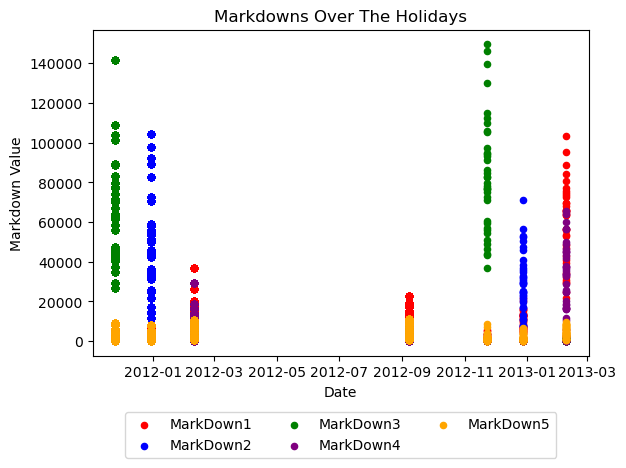

In [109]:
fig, ax = plt.subplots()

# Plotting each markdown series as a scatter plot on the same axes with different colors
holidaysDF.plot.scatter(x="Date", y="MarkDown1", ax=ax, color='red', label='MarkDown1')
holidaysDF.plot.scatter(x="Date", y="MarkDown2", ax=ax, color='blue', label='MarkDown2')
holidaysDF.plot.scatter(x="Date", y="MarkDown3", ax=ax, color='green', label='MarkDown3')
holidaysDF.plot.scatter(x="Date", y="MarkDown4", ax=ax, color='purple', label='MarkDown4')
holidaysDF.plot.scatter(x="Date", y="MarkDown5", ax=ax, color='orange', label='MarkDown5')

# Optionally, add a title and labels
ax.set_title('Markdowns Over The Holidays')
ax.set_xlabel('Date')
ax.set_ylabel('Markdown Value')

# Add a legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


Clearly, markdows are only on some days during holidays. We can use this information to compare sales on markdown days and non-markdown days

In [110]:
# List of markdown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Filter rows where any of the markdown columns is greater than 0
holidaysMarkDownDF = holidaysDF[holidaysDF[markdown_columns].gt(0).any(axis=1)]

# Filter rows where any of the markdown columns is equal to 0
holidaysNoMarkDownDF = holidaysDF[holidaysDF[markdown_columns].isna().all(axis=1)]

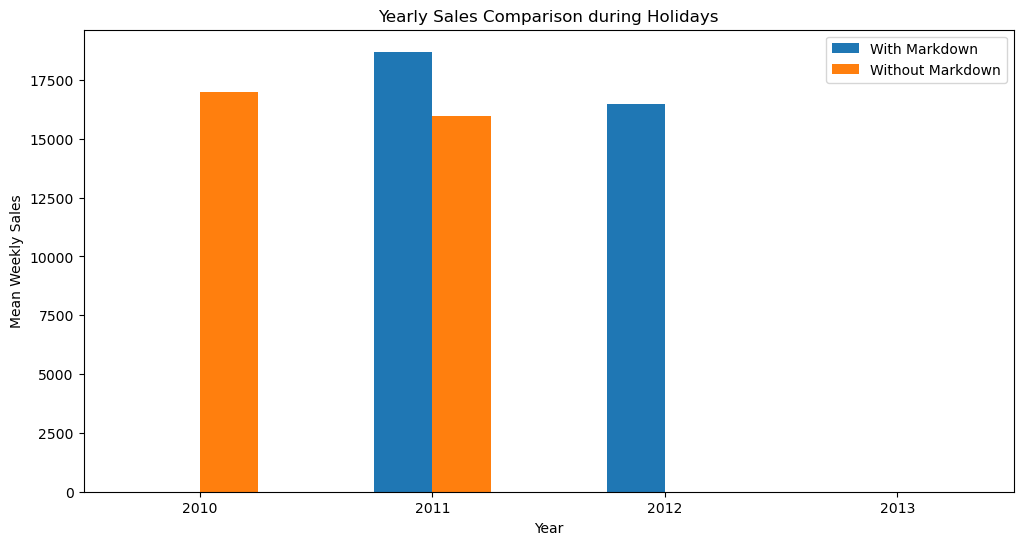

In [111]:
# Extract the year from the date for both dataframes
holidaysMarkDownDF['Year'] = holidaysMarkDownDF['Date'].dt.year
holidaysNoMarkDownDF['Year'] = holidaysNoMarkDownDF['Date'].dt.year

# Aggregate Weekly_Sales by year
sales_markdown = holidaysMarkDownDF.groupby('Year')['Weekly_Sales'].mean()
sales_no_markdown = holidaysNoMarkDownDF.groupby('Year')['Weekly_Sales'].mean()

# Combine the data into a single dataframe for plotting
combined_sales = pd.DataFrame({'With Markdown': sales_markdown, 'Without Markdown': sales_no_markdown})

# Plotting
combined_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Yearly Sales Comparison during Holidays')
plt.xlabel('Year')
plt.ylabel('Mean Weekly Sales')
plt.xticks(rotation=0)  # Keeping the year labels horizontal for readability
plt.show()

Markdowns do appear to have contributed to sales especially during holidays.
We will now see how weekly sales across the board varied over time and how markdowns impacted it¶


In [112]:
# Group sales and markdowns by date
WeeklyMeanSales = mergedDF.groupby('Date')['Weekly_Sales'].mean()
WeeklyMeanMarkDown = [mergedDF.groupby('Date')['MarkDown1'].mean(),
                     mergedDF.groupby('Date')['MarkDown2'].mean(),
                     mergedDF.groupby('Date')['MarkDown3'].mean(),
                     mergedDF.groupby('Date')['MarkDown4'].mean(),
                     mergedDF.groupby('Date')['MarkDown5'].mean()]

WeeklyMeanSales = WeeklyMeanSales.replace(0, np.nan)


# Replace 0 with NaN in each markdown series in yearlySumMarkDown
WeeklyMeanMarkDown = [md.replace(0, np.nan) for md in WeeklyMeanMarkDown]


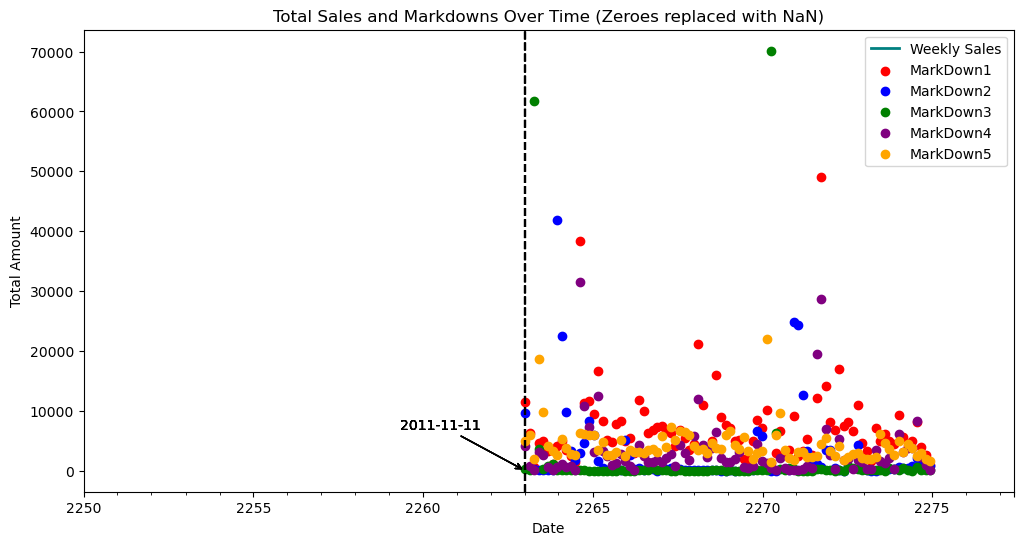

In [113]:
plt.figure(figsize=(12, 6))

# Plot for sales
WeeklyMeanSales.plot(label='Weekly Sales', color='teal', linewidth=2)

# Colors for each markdown
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot for each markdown and draw vertical line with annotation
for i, md in enumerate(WeeklyMeanMarkDown):
    # Find the first non-NaN date for this markdown
    start_date = md.first_valid_index()
    
    # Plot markdown as scatter
    plt.scatter(md.index, md, label=f'MarkDown{i+1}', color=colors[i])
    
    # Draw vertical line
    plt.axvline(x=start_date, color='black', linestyle='--')

    # Add annotation for the start date
    plt.annotate(start_date.strftime('%Y-%m-%d'), 
                 xy=(start_date, 0), 
                 xycoords='data', 
                 xytext=(-90, 30), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                 color='black')

plt.title('Total Sales and Markdowns Over Time (Zeroes replaced with NaN)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2013-12-01'))
plt.legend()
plt.show()

Since the Markdowns were introduced on Nov 11th 2011, it will be interesting to compare sales before and after

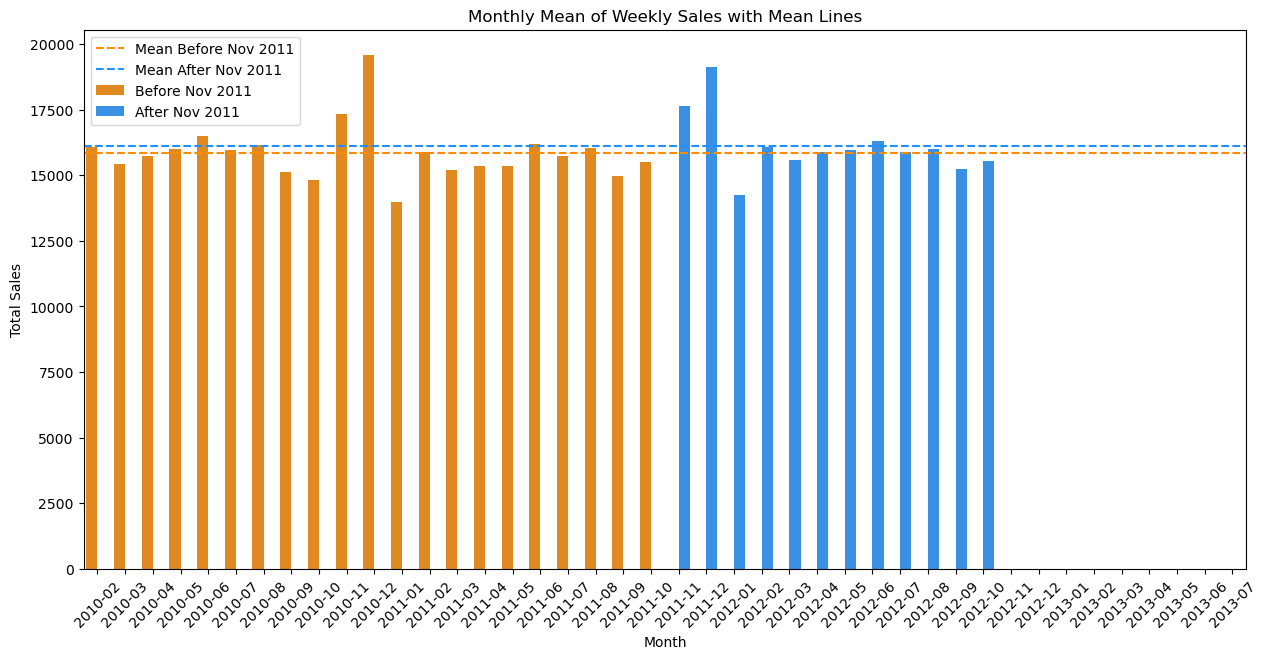

In [114]:
# Resample and sum the sales monthly
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()

# Add a new column to classify data based on the date
monthlySales['Period'] = monthlySales['Date'].apply(lambda x: 'Before Nov 2011' if x < pd.Timestamp('2011-11-01') else 'After Nov 2011')

# Convert 'Date' to a period (for cleaner x-axis labels)
monthlySales['Date'] = monthlySales['Date'].dt.to_period('M')

# Plotting with Seaborn
plt.figure(figsize=(15, 7))
sns.barplot(data=monthlySales, x='Date', y='Weekly_Sales', hue='Period', palette=['darkorange', 'dodgerblue'])

# Calculate and plot the means for the two groups
mean_before_nov2011 = monthlySales[monthlySales['Period'] == 'Before Nov 2011']['Weekly_Sales'].mean()
mean_after_nov2011 = monthlySales[monthlySales['Period'] == 'After Nov 2011']['Weekly_Sales'].mean()

plt.axhline(mean_before_nov2011, color='darkorange', linestyle='--', label='Mean Before Nov 2011')
plt.axhline(mean_after_nov2011, color='dodgerblue', linestyle='--', label='Mean After Nov 2011')

plt.title('Monthly Mean of Weekly Sales with Mean Lines')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()

plt.show()


# So the sales have shown an increase after the markdowns have been introduced.

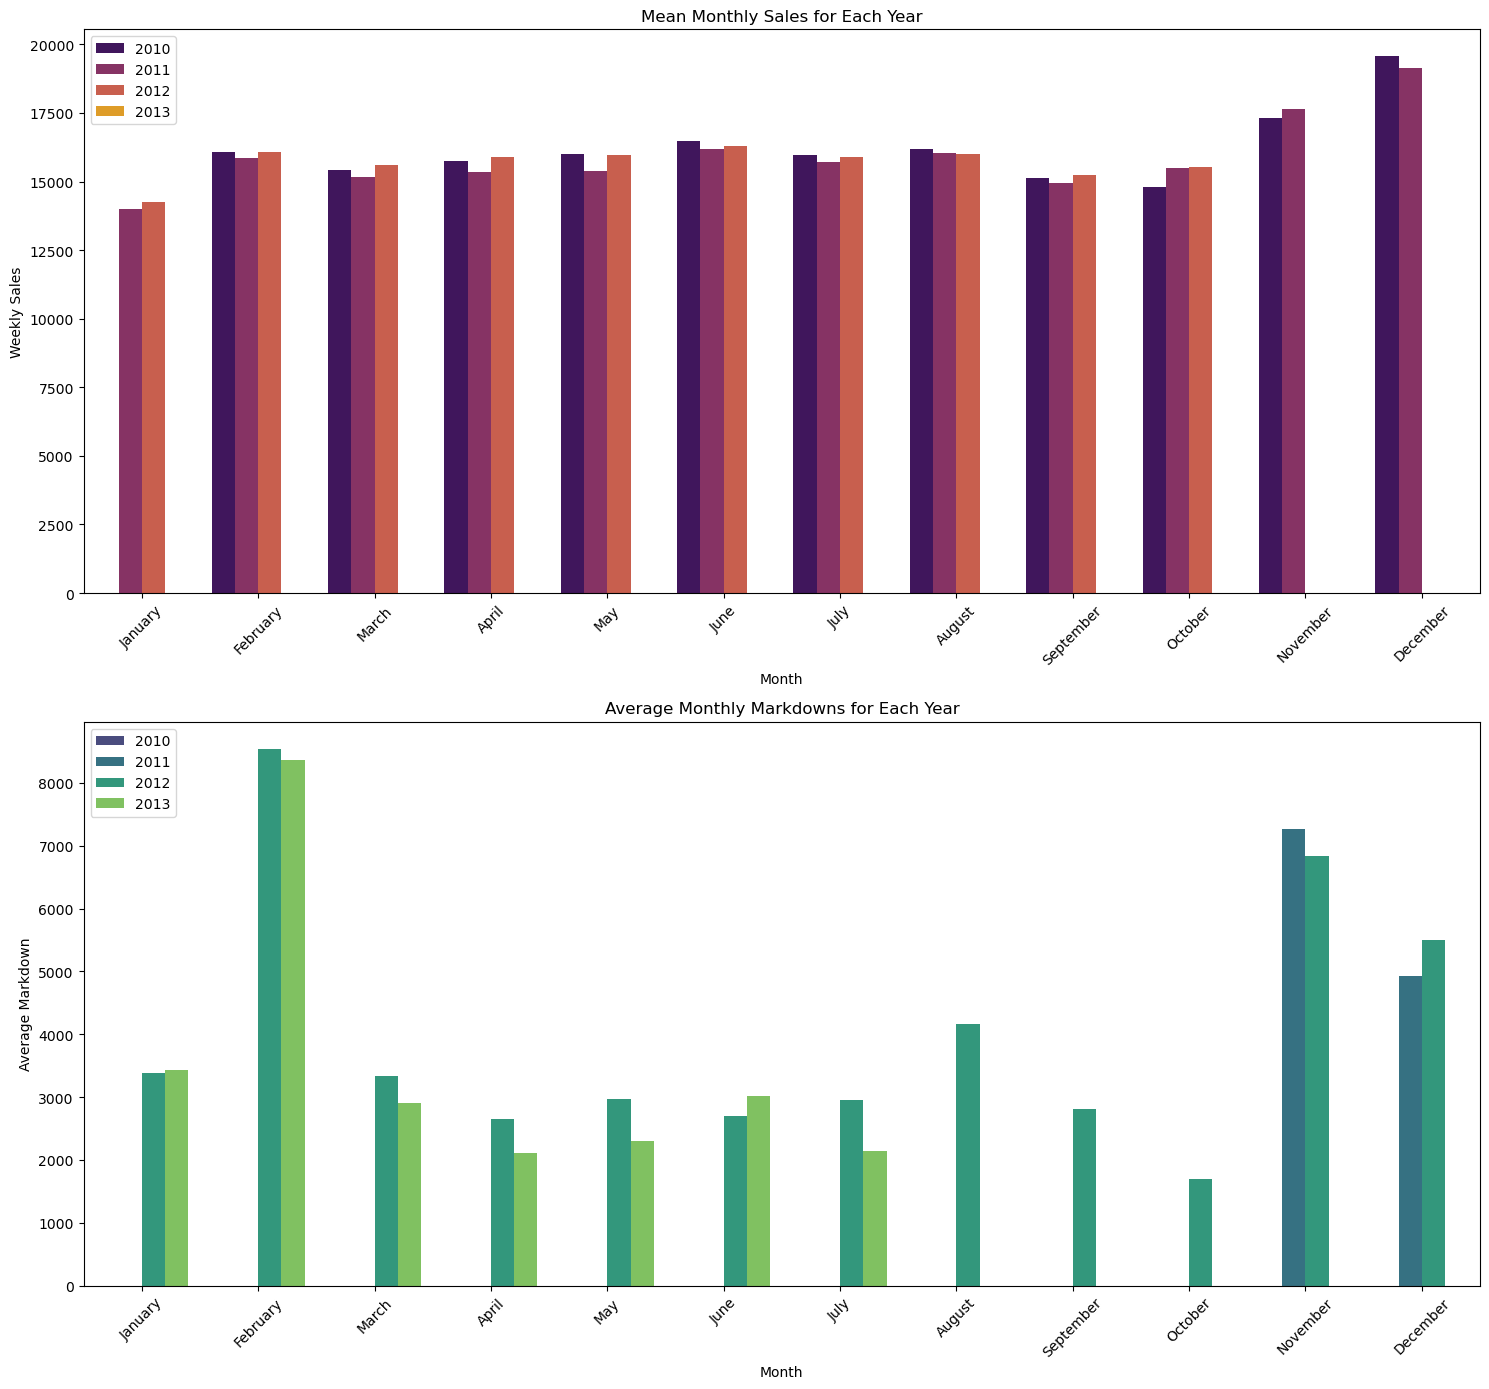

In [115]:
# Extract year and month
mergedDF['Year'] = mergedDF['Date'].dt.year
mergedDF['Month'] = mergedDF['Date'].dt.month_name()

# Group by year and month, and calculate the mean of sales and markdowns
grouped = mergedDF.groupby(['Year', 'Month'])
monthly_data = grouped[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().reset_index()

# Add a column for average markdown
monthly_data['AvgMarkDown'] = monthly_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean(axis=1)

# Define the correct order for the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the defined order
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)

# Sort the data
monthly_data.sort_values(by=['Year', 'Month'], inplace=True)

# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

# Plotting the sales data on the first subplot
sns.barplot(data=monthly_data, x='Month', y='Weekly_Sales', hue='Year', palette='inferno', ax=ax1)
ax1.set_title('Mean Monthly Sales for Each Year')
ax1.set_xlabel('Month')
ax1.set_ylabel('Weekly Sales')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Plotting the markdown data on the second subplot
sns.barplot(data=monthly_data, x='Month', y='AvgMarkDown', hue='Year', palette='viridis', ax=ax2)
ax2.set_title('Average Monthly Markdowns for Each Year')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Markdown')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


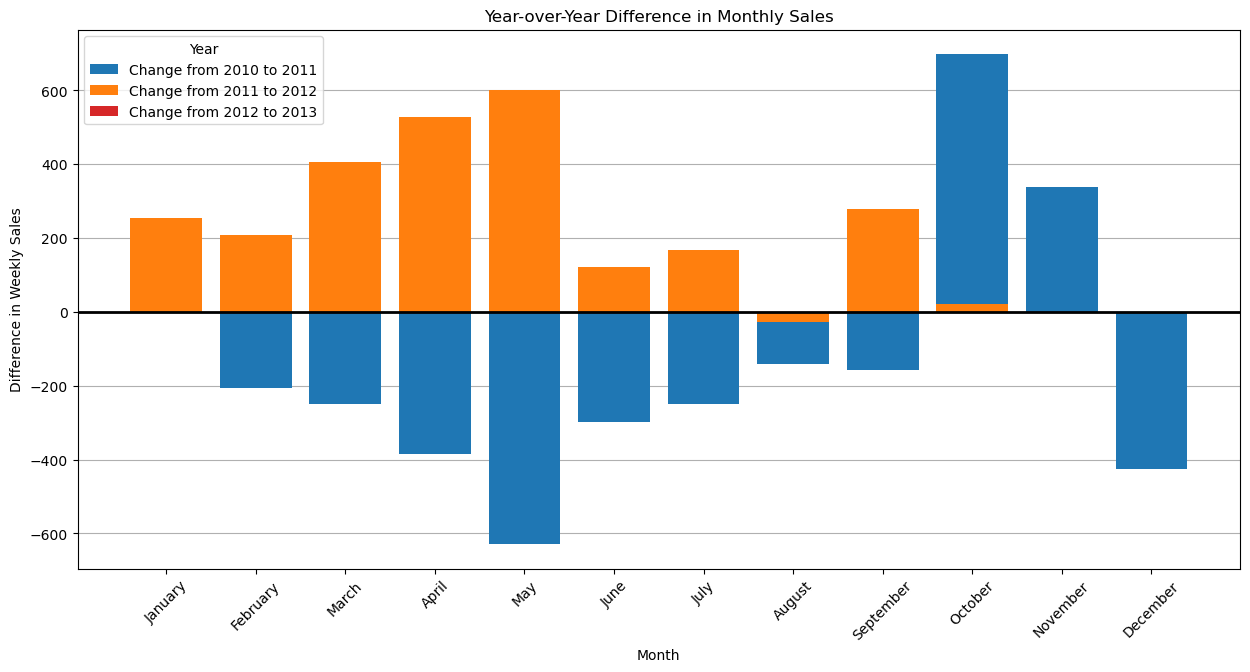

In [116]:
# Pivot the data to have years as columns and months as rows
pivot_sales = monthly_data.pivot(index='Month', columns='Year', values='Weekly_Sales')

# Calculate the year-over-year difference
yearly_diff = pivot_sales.diff(axis=1)

# Drop the first column as it will be NaN due to the diff operation
yearly_diff = yearly_diff.iloc[:, 1:]

# Reset index to flatten the DataFrame for plotting
yearly_diff = yearly_diff.reset_index().melt(id_vars='Month', var_name='Year', value_name='SalesDifference')

# Create the plot
plt.figure(figsize=(15, 7))
# Define the palette
palette = ['tab:blue', 'tab:orange', 'tab:red']

# Plotting each set of bars
for i, year in enumerate(yearly_diff['Year'].unique()):
    # Filter the data for each year
    data = yearly_diff[yearly_diff['Year'] == year]
    plt.bar(data['Month'], data['SalesDifference'], color=palette[i], label=f'Change from {year-1} to {year}',zorder=2)

plt.axhline(y=0, color='black', linewidth=2)   
    
plt.title('Year-over-Year Difference in Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Difference in Weekly Sales')
plt.xticks(rotation=45)
plt.grid(axis='y',zorder=0)

# Adding the legend
plt.legend(title='Year', loc='upper left')
plt.show()

    # This figure shows that since the introduction of MarkDowns since Nov 2011, there has been a steady increase in Sales each month.
    # However, the sales in December 2011 were lower than December 2010 despite the introduction of MarkDowns
    # The most significant impact of markdows is seen between January 2012 to May 2012 where sales have increased each month compared to the previous year when it decreased
    # It appears that MarkDowns have a greater impact during non-Holiday periods like December



# Performance of the top stores and departments:

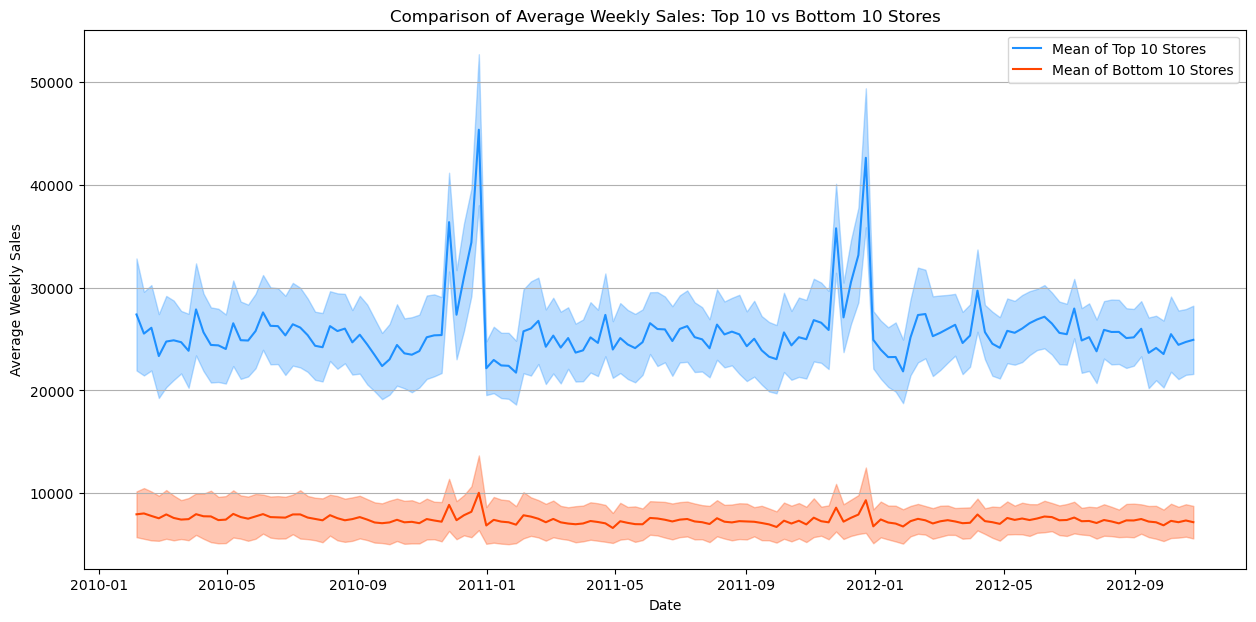

In [117]:
# Group by 'Store' and 'Date' and calculate the mean of 'Weekly_Sales'
grouped_data = mergedDF.groupby(['Store', 'Date'])['Weekly_Sales'].mean().reset_index()

top_10_stores = rankedStores.nlargest(10).index.tolist()
bottom_10_stores = rankedStores.nsmallest(10).index.tolist()

# Function to calculate mean and standard deviation for a list of stores
def calculate_stats(store_list):
    store_data = grouped_data[grouped_data['Store'].isin(store_list)]
    return store_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'std'])

# Calculate stats for top 10 and bottom 10 stores
top_10_stats = calculate_stats(top_10_stores)
bottom_10_stats = calculate_stats(bottom_10_stores)

# Plotting
plt.figure(figsize=(15, 7))

# Top 10 stores
plt.plot(top_10_stats.index, top_10_stats['mean'], label='Mean of Top 10 Stores', color='dodgerblue')
plt.fill_between(top_10_stats.index, 
                 top_10_stats['mean'] - top_10_stats['std'], 
                 top_10_stats['mean'] + top_10_stats['std'], 
                 color='dodgerblue', alpha=0.3)

# Bottom 10 stores
plt.plot(bottom_10_stats.index, bottom_10_stats['mean'], label='Mean of Bottom 10 Stores', color='orangered')
plt.fill_between(bottom_10_stats.index, 
                 bottom_10_stats['mean'] - bottom_10_stats['std'], 
                 bottom_10_stats['mean'] + bottom_10_stats['std'], 
                 color='orangered', alpha=0.3)

plt.title('Comparison of Average Weekly Sales: Top 10 vs Bottom 10 Stores')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(axis='y')
plt.show()


# Let's look at the top 10 stores and what impacted the performance are:

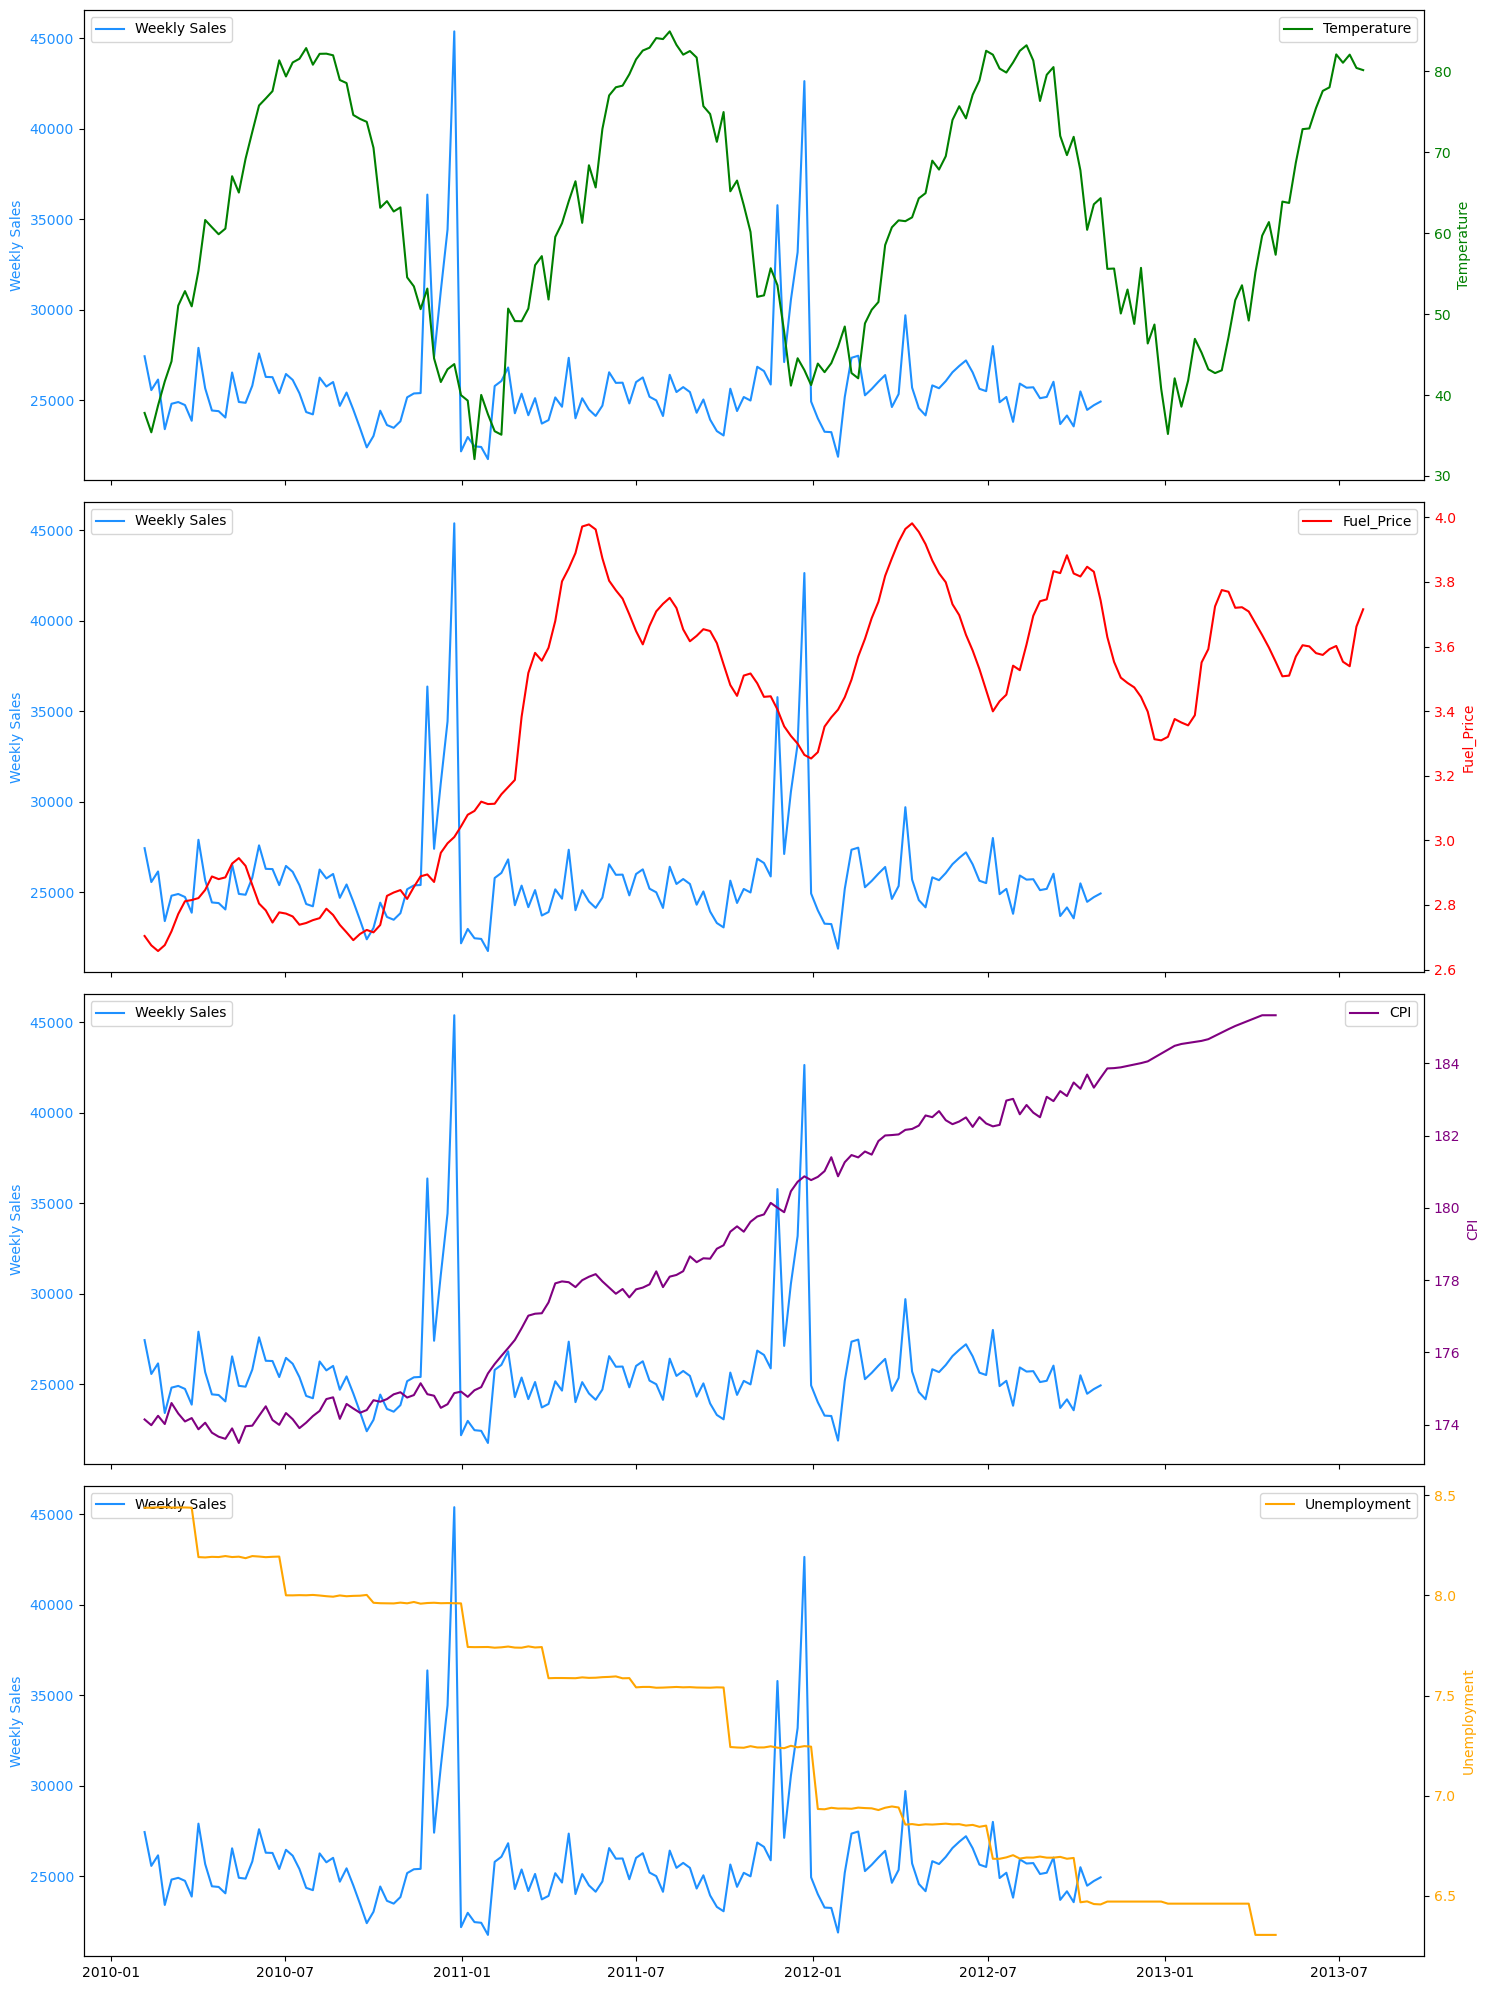

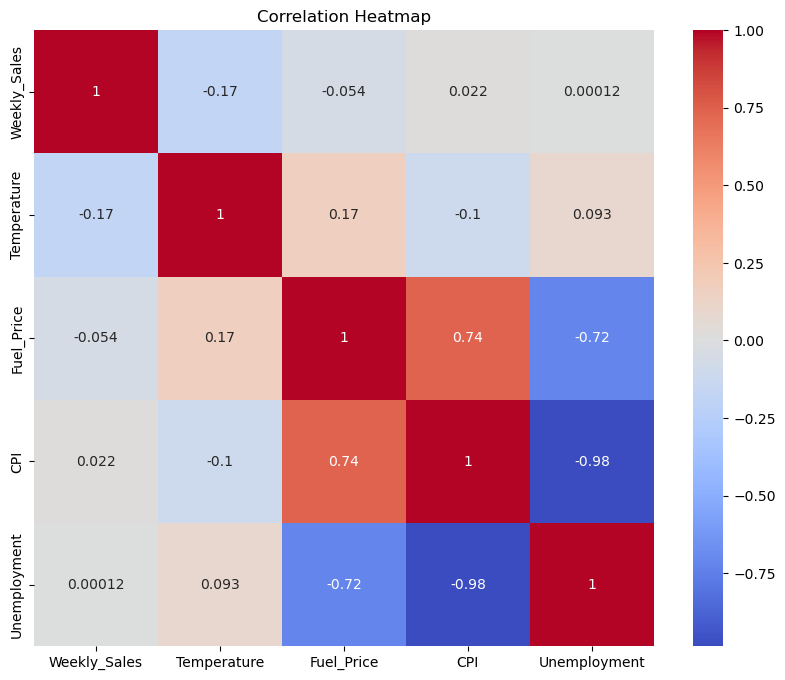

In [118]:
# Filter data for top 10 stores
top_10_stores = rankedStores.nlargest(10).index.tolist()
top_10_data = mergedDF[mergedDF['Store'].isin(top_10_stores)]

# Group by 'Date' and calculate the mean for the necessary columns
grouped_data = top_10_data.groupby('Date')[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

# List of columns to pair with 'Weekly_Sales' and their colors
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
colors = ['green', 'red', 'purple', 'orange']

for i, col in enumerate(columns):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # Weekly Sales plot
    ax1.plot(grouped_data['Date'], grouped_data['Weekly_Sales'], color='dodgerblue', label='Weekly Sales')
    ax1.set_ylabel('Weekly Sales', color='dodgerblue')
    ax1.tick_params(axis='y', labelcolor='dodgerblue')
    
    # Other column plot
    ax2.plot(grouped_data['Date'], grouped_data[col], color=colors[i], label=col)
    ax2.set_ylabel(col, color=colors[i])
    ax2.tick_params(axis='y', labelcolor=colors[i])

    # Adding legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Correlation heatmap
corr = grouped_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

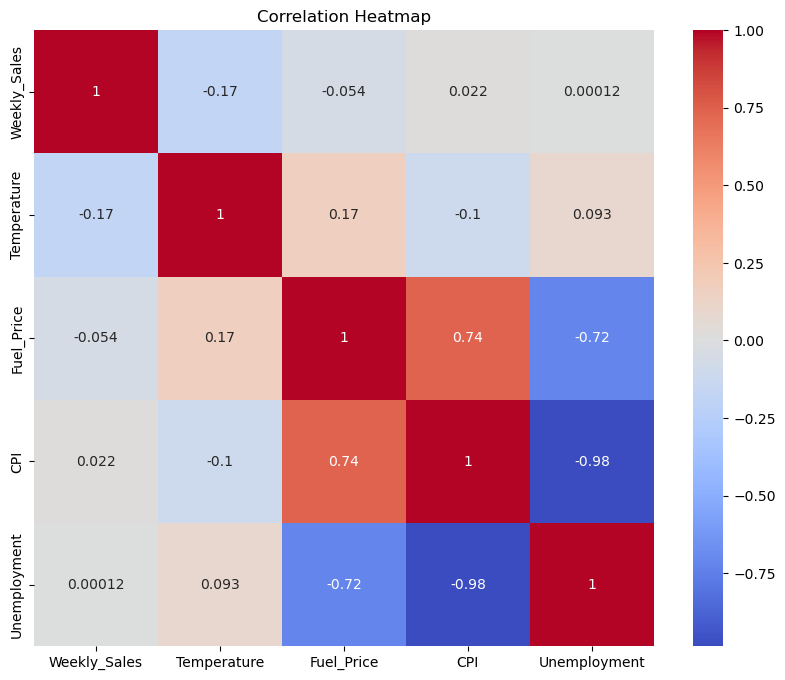

In [119]:
# Correlation heatmap
corr = grouped_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

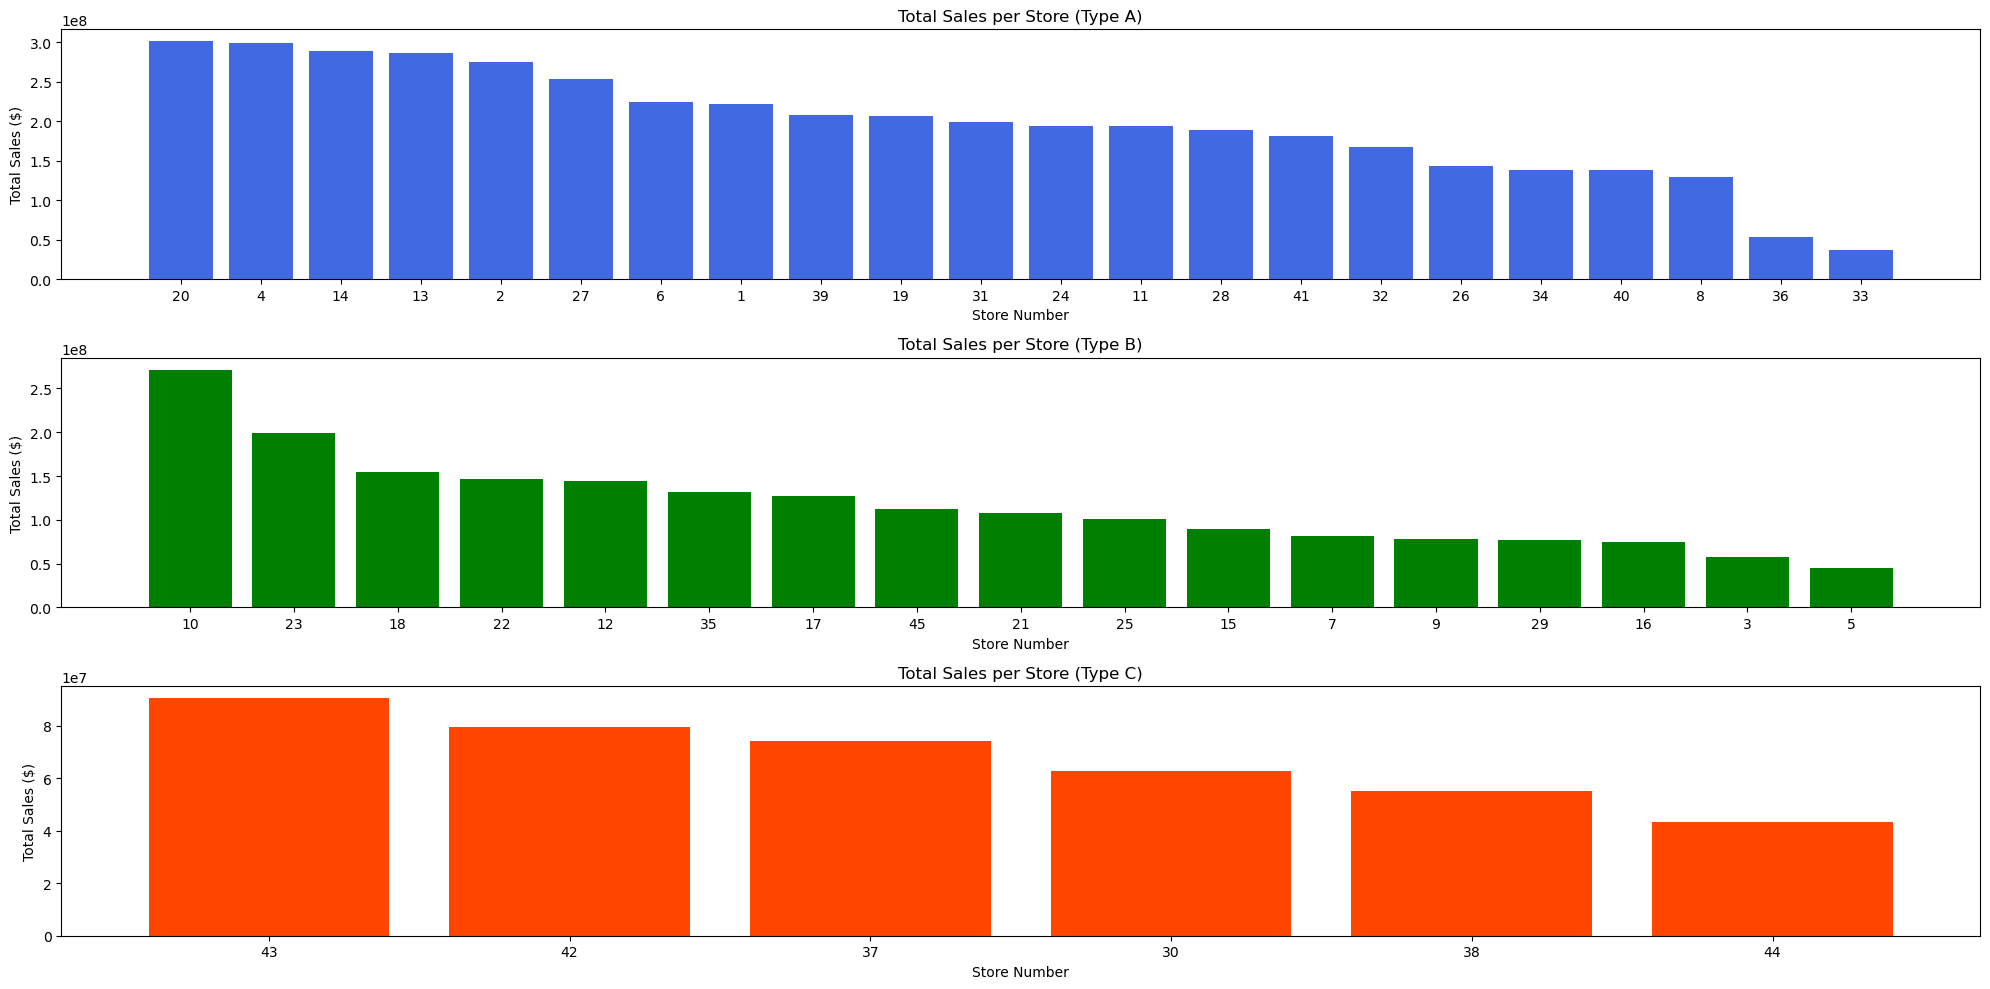

In [120]:
storesA = mergedDF[mergedDF['Type']=='A']
storesB = mergedDF[mergedDF['Type']=='B']
storesC = mergedDF[mergedDF['Type']=='C']

# Aggregate sales data at the store level for each type
totalSales_A = storesA.groupby('Store')['Weekly_Sales'].sum()
totalSales_B = storesB.groupby('Store')['Weekly_Sales'].sum()
totalSales_C = storesC.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores within each type based on total sales in descending order
rankedStores_A = totalSales_A.sort_values(ascending=False)
rankedStores_B = totalSales_B.sort_values(ascending=False)
rankedStores_C = totalSales_C.sort_values(ascending=False)

# Define colors for each store type
type_colors = {'A': 'royalblue', 'B': 'green', 'C': 'orangered'}

# Create individual bar plots for each store type
plt.figure(figsize=(20, 10))

# Plot for Type A
plt.subplot(311)
plt.bar(range(len(rankedStores_A)), rankedStores_A.values, color=type_colors['A'])
plt.title('Total Sales per Store (Type A)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_A.index.tolist()  # Use store numbers from Type A
plt.xticks(range(len(xticks_labels)),xticks_labels)


# Plot for Type B
plt.subplot(312)
plt.bar(range(len(rankedStores_B)), rankedStores_B.values, color=type_colors['B'])
plt.title('Total Sales per Store (Type B)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_B.index.tolist()  # Use store numbers from Type B
plt.xticks(range(len(xticks_labels)),xticks_labels)


# Plot for Type C
plt.subplot(313)
plt.bar(range(len(rankedStores_C)), rankedStores_C.values, color=type_colors['C'])
plt.title('Total Sales per Store (Type C)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_C.index.tolist()  # Use store numbers from Type C
plt.xticks(range(len(xticks_labels)),xticks_labels)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


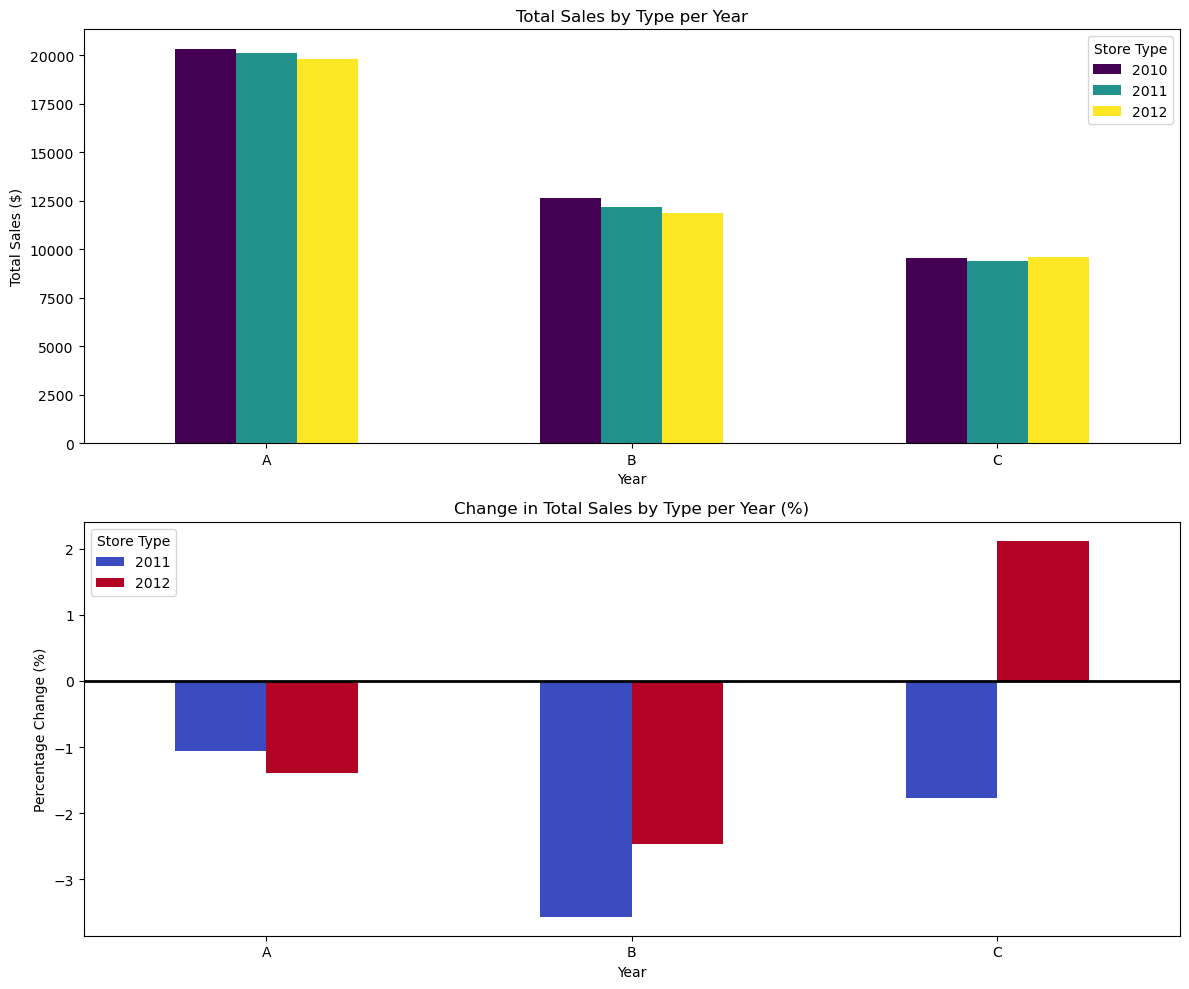

In [121]:
# Filter the DataFrame to exclude the year 2013
filteredDF = mergedDF[mergedDF['Year'] != 2013]

# Aggregate sales data at the store level for each type
totalSales_by_type_year = filteredDF.groupby(['Type', 'Year'])['Weekly_Sales'].mean().unstack()
totalSales_change_by_type_year = totalSales_by_type_year.pct_change(axis=1) * 100  # Calculate percentage change
totalSales_change_by_type_year = totalSales_change_by_type_year.drop(columns=2010)
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot total sales by type per year
totalSales_by_type_year.plot(kind='bar', ax=axes[0], colormap='viridis', rot=0)
axes[0].set_title('Total Sales by Type per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales ($)')
axes[0].legend(title='Store Type')

# Plot change in total sales by type per year
totalSales_change_by_type_year.plot(kind='bar', ax=axes[1], colormap='coolwarm', rot=0)
axes[1].set_title('Change in Total Sales by Type per Year (%)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage Change (%)')
axes[1].legend(title='Store Type')
axes[1].axhline(y=0, linewidth=2,color='k')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

So the stores of Type A have the highest amount of sales every year, followed by stores B and C. Also, store types A and B experienced drop in sales while store C had an increase of 2% sales from 2011 to 2012.


# What caused the drop in sales between 2011 to 2012?

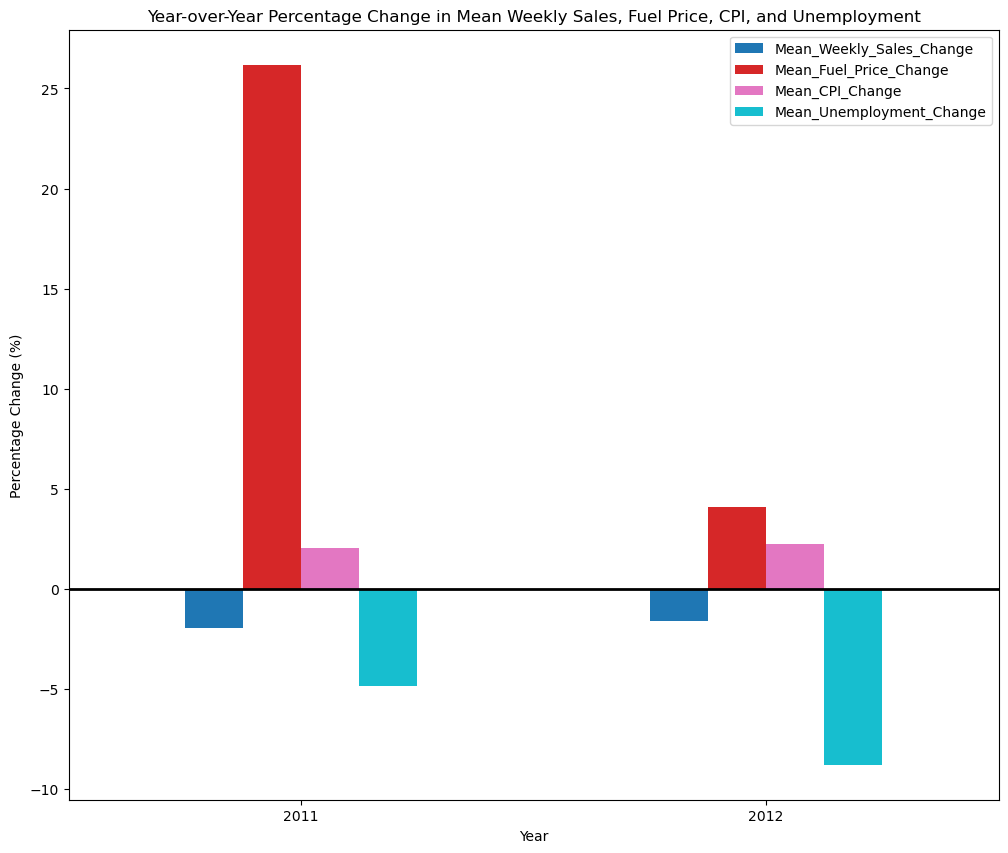

In [122]:
# Group by 'Year' and calculate the mean for the columns
yearly_mean_data = mergedDF.groupby('Year')[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].mean()

yearly_change_data = pd.DataFrame()

# Calculate year-over-year percentage change for the columns
yearly_change_data['Mean_Weekly_Sales_Change'] = yearly_mean_data['Weekly_Sales'].pct_change() * 100
yearly_change_data['Mean_Fuel_Price_Change'] = yearly_mean_data['Fuel_Price'].pct_change() * 100
yearly_change_data['Mean_CPI_Change'] = yearly_mean_data['CPI'].pct_change() * 100
yearly_change_data['Mean_Unemployment_Change'] = yearly_mean_data['Unemployment'].pct_change() * 100

# Reset the index to make 'Year' a column
yearly_mean_data = yearly_mean_data.reset_index()

yearly_change_data = yearly_change_data.drop([2010, 2013])

# Create separate bar plots for percentage changes
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
yearly_change_data.plot(kind='bar', ax=axes, colormap='tab10',rot=0)
axes.set_title('Year-over-Year Percentage Change in Mean Weekly Sales, Fuel Price, CPI, and Unemployment')
axes.set_xlabel('Year')
axes.set_ylabel('Percentage Change (%)')
axes.axhline(y=0, linewidth=2,color='k')
plt.legend()
plt.show()


We see that with the drop in unemployment and increase in CPI as well as the introduction of Markdowns, the drop in weekly changes reduced between 2011 and 2012.

# Predicting future sales
1. Understanding Seasonality:

<Figure size 1200x600 with 0 Axes>

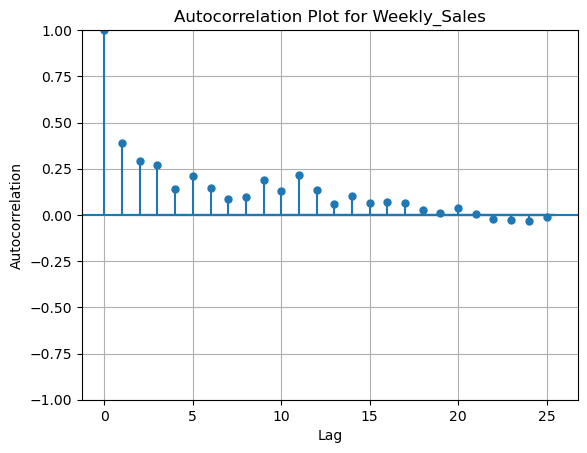

<Figure size 1200x600 with 0 Axes>

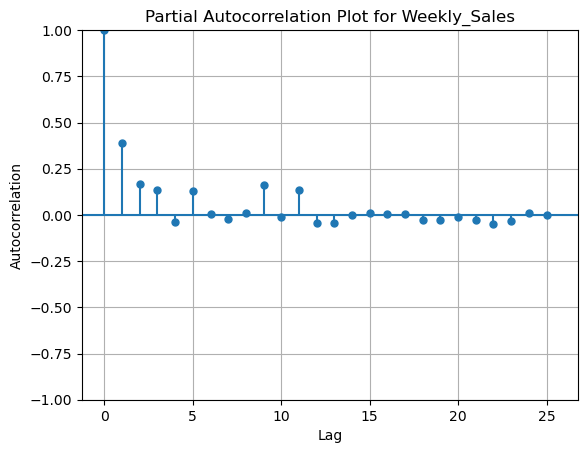

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mergedDF.dropna(inplace=True)

# Step 2: Create a time series DataFrame
# Set the 'Date' column as the index
ts_df = mergedDF.set_index('Date')

# Step 3: Plot the autocorrelation function (ACF) for Weekly_Sales
plt.figure(figsize=(12, 6))
plot_acf(ts_df['Weekly_Sales'], lags=25)
plt.title("Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Step 3: Plot the partial autocorrelation function (ACF) for Weekly_Sales
plt.figure(figsize=(12, 6))
plot_pacf(ts_df['Weekly_Sales'], lags=25)
plt.title("Partial Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Based on the autocorrelation plot, we see that 1-day and 72-day corretlations are high:

In [124]:
# Lag the "Weekly_Sales" column by one day
mergedDF['Lagged_Weekly_Sales'] = mergedDF['Weekly_Sales'].shift(1)

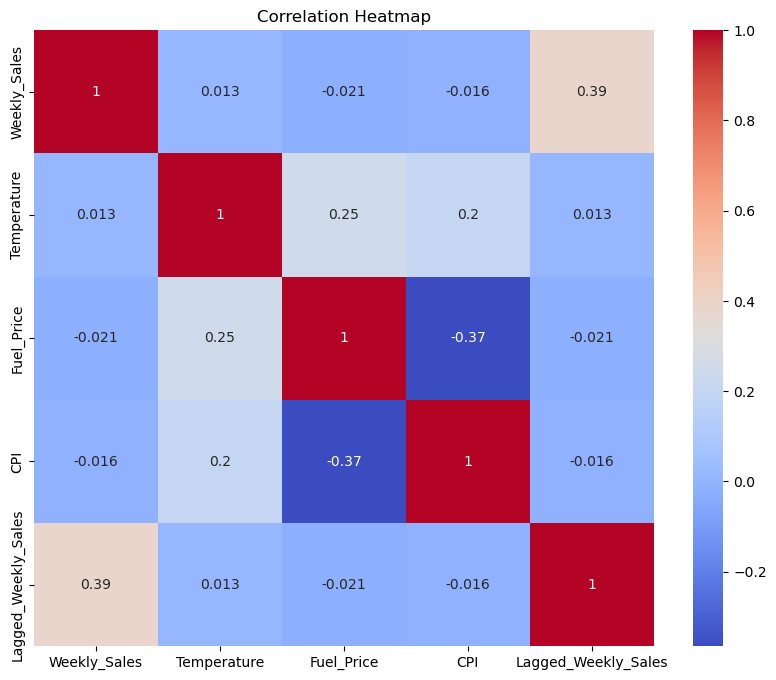

In [125]:
# Correlation heatmap
corr = mergedDF[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Lagged_Weekly_Sales']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We see that among the other available variables, the 1-Day lagged sales has the best correlation :

In [126]:
from sklearn.linear_model import LinearRegression

X = mergedDF.loc[:, ['Lagged_Weekly_Sales']].dropna()  # features
y = mergedDF.loc[:, 'Weekly_Sales']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

X = X/1e3;
y = y/1e3;

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred =  pd.Series(model.predict(X), index=X.index)

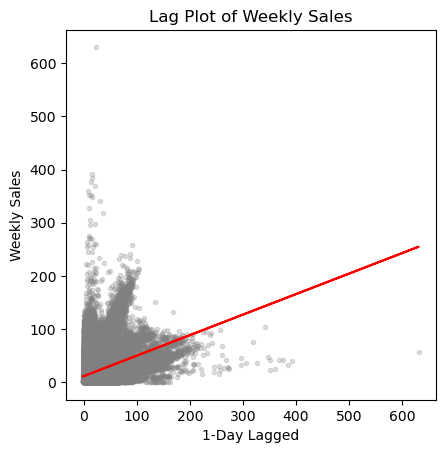

In [127]:
fig, ax = plt.subplots()
ax.plot(X['Lagged_Weekly_Sales'], y, '.', color='gray',alpha=0.25)
ax.plot(X['Lagged_Weekly_Sales'], y_pred,color='red')
ax.set(aspect='equal', ylabel='Weekly Sales', xlabel='1-Day Lagged', title='Lag Plot of Weekly Sales');

# Can we do better with monthly averaged data?

<Figure size 1200x600 with 0 Axes>

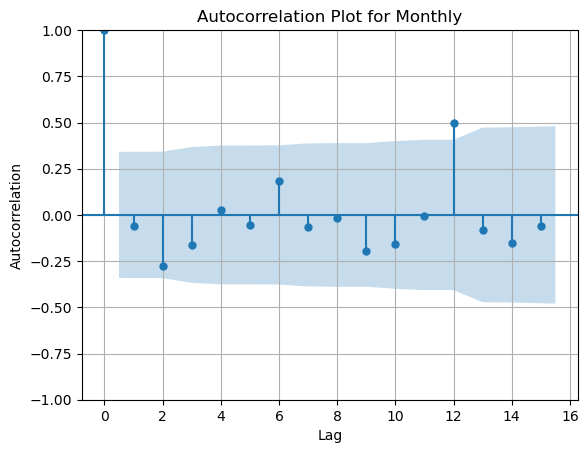

<Figure size 1200x600 with 0 Axes>

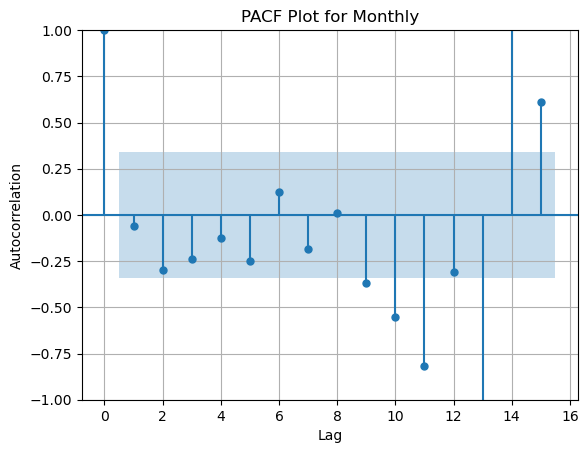

In [128]:
# Using the previous monthlySales dataFrame

df = monthlySales.dropna()
plt.figure(figsize=(12, 6))
plot_acf(df['Weekly_Sales'],lags=15)
plt.title("Autocorrelation Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

df = monthlySales.dropna()
plt.figure(figsize=(12, 6))
plot_pacf(df['Weekly_Sales'],lags=15)
plt.title("PACF Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

In [129]:
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()
monthlySales['Date_Numeric'] = (monthlySales['Date'] - monthlySales['Date'].min()).dt.days

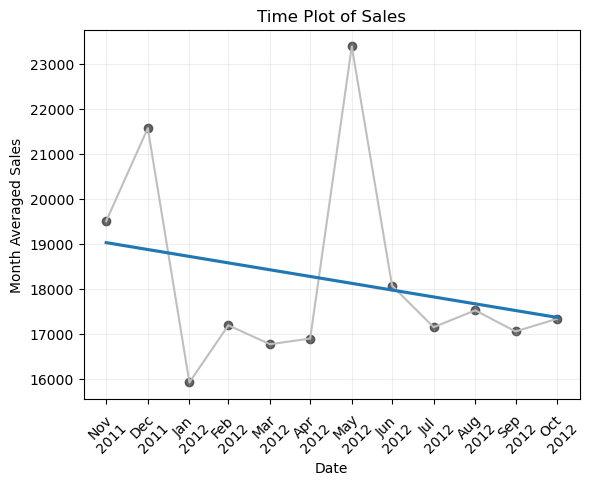

In [130]:
fig, ax = plt.subplots()

# Plot a line plot
ax.plot('Date_Numeric', 'Weekly_Sales', data=monthlySales, color='0.75')

# Add a regression plot onto the same ax without overwriting it
sns.regplot(x='Date_Numeric', y='Weekly_Sales', data=monthlySales, ci=None, scatter_kws={"color": "0.25"}, ax=ax)

ax.set_title('Time Plot of Sales')


# Set x-ticks
ax.set_xticks(monthlySales['Date_Numeric'])  # This sets ticks at the positions of Date_Numeric

# Format x-tick labels to display as month and year
ax.set_xticklabels([date.strftime('%b\n%Y') for date in monthlySales['Date']])

ax.set_xlabel('Date')
ax.set_ylabel('Month Averaged Sales')

plt.grid(True,alpha=0.2)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

# Applying a simple moving average to the monthly data:

In [131]:
monthlySales.set_index('Date', inplace=True)

# Calculate the 3-period SMA
monthlySales['SMA_3'] = monthlySales['Weekly_Sales'].rolling(window=3).mean()

# Forecast the next period's sales (this will be NaN as it's a forecast)
next_period_forecast = monthlySales['SMA_3'].iloc[-1]

print(f"The forecast for Nov 2013 sales is {next_period_forecast}")

The forecast for Nov 2013 sales is 17310.805143523943


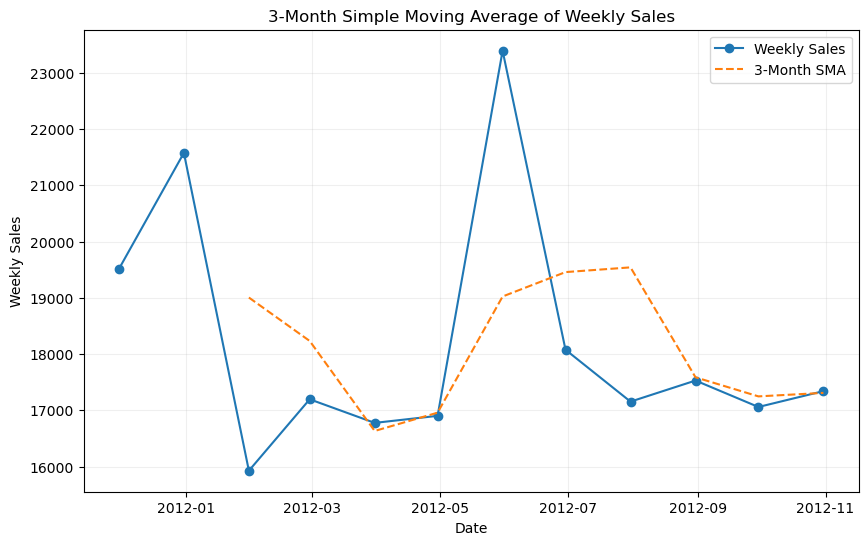

In [132]:
# Plotting the moving average along with the original sales data
plt.figure(figsize=(10, 6))
plt.plot(monthlySales.index, monthlySales['Weekly_Sales'],marker='o', label='Weekly Sales')
plt.plot(monthlySales.index, monthlySales['SMA_3'], label='3-Month SMA', linestyle='--')
plt.title('3-Month Simple Moving Average of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# Applying ARIMA and Seasonal ARIMA to sales per store/dept and averaged across:

In [133]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


# From the previous sections, we know that Store # 20 and Dept. # 92 have the highest sales

In [134]:
maxDF = mergedDF[(mergedDF['Store'] == 20) & (mergedDF['Dept'] == 92)]
maxDF.set_index('Date',inplace=True)

In [135]:
timeSeries = maxDF['Weekly_Sales']

check_stationarity(timeSeries)


# Apply differencing
timeSeries_diff = timeSeries.diff().dropna()

ADF Statistic: -1.739504
p-value: 0.410883
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


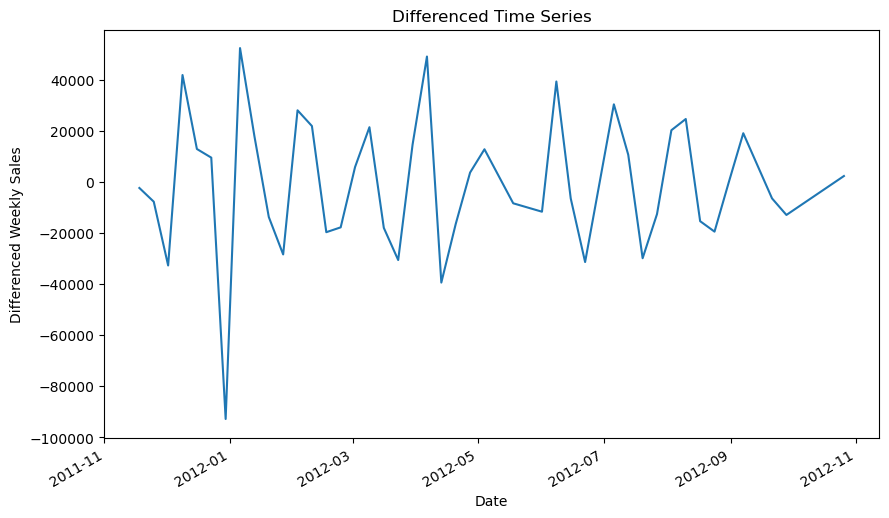

<Figure size 1000x600 with 0 Axes>

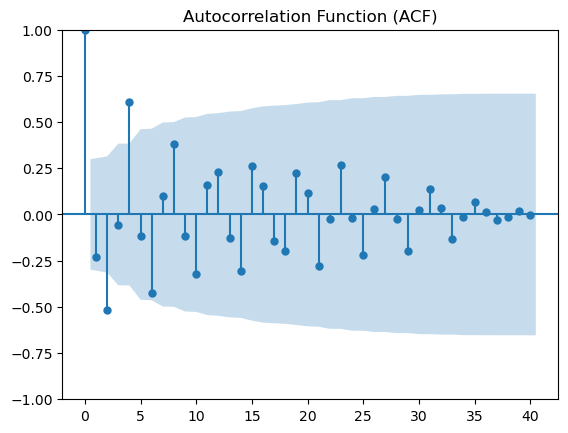

<Figure size 1000x600 with 0 Axes>

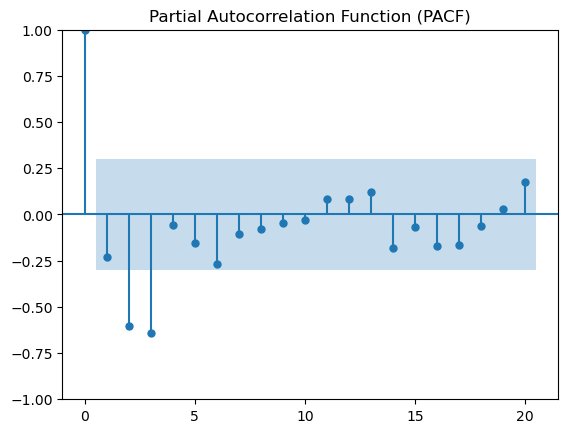

In [136]:
# Plotting the differenced series
plt.figure(figsize=(10, 6))
timeSeries_diff.plot()
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Weekly Sales')
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(timeSeries_diff, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(timeSeries_diff, lags=20, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [137]:
check_stationarity(timeSeries_diff)

ADF Statistic: -12.055138
p-value: 0.000000
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


p = 3 from the PACF plot
d = 1 since we did one differencing
q = 4 or 6 based on high values in ACF

In [138]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Split the data into train and test sets
split_point = int(len(timeSeries) * 0.75)
train, test = timeSeries[0:split_point], timeSeries[split_point:]

# Step 2: Define ARIMA parameters (example: p=1, d=0, q=1)
p, d, q = 3, 1, 4

# Step 3: Fit the ARIMA model on the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                   33
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -365.354
Date:                Sat, 30 Mar 2024   AIC                            746.707
Time:                        01:39:20   BIC                            758.433
Sample:                             0   HQIC                           750.594
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9501      0.396      2.397      0.017       0.173       1.727
ar.L2         -0.9243      0.049    -18.911      0.000      -1.020      -0.829
ar.L3          0.9510      0.379      2.512      0.0

In [139]:
# Step 4: Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20376.646


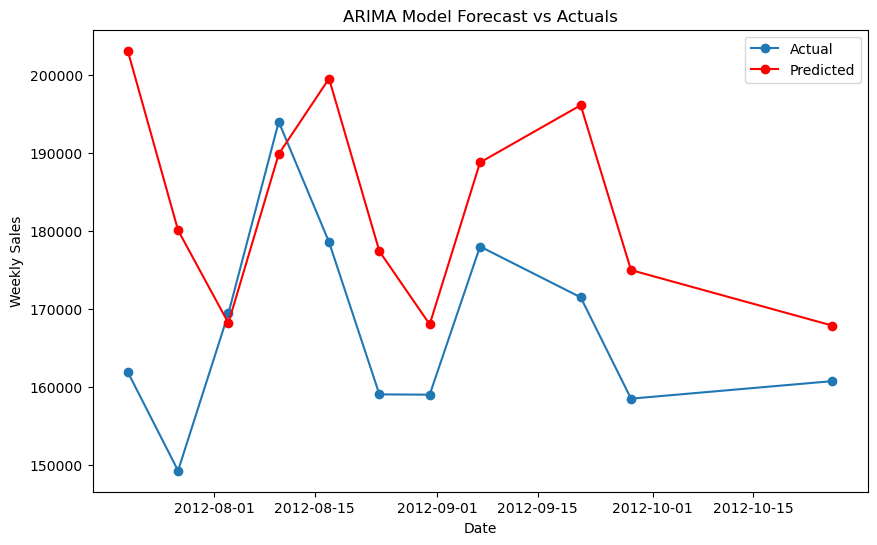

In [140]:
# Optional: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Actual')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

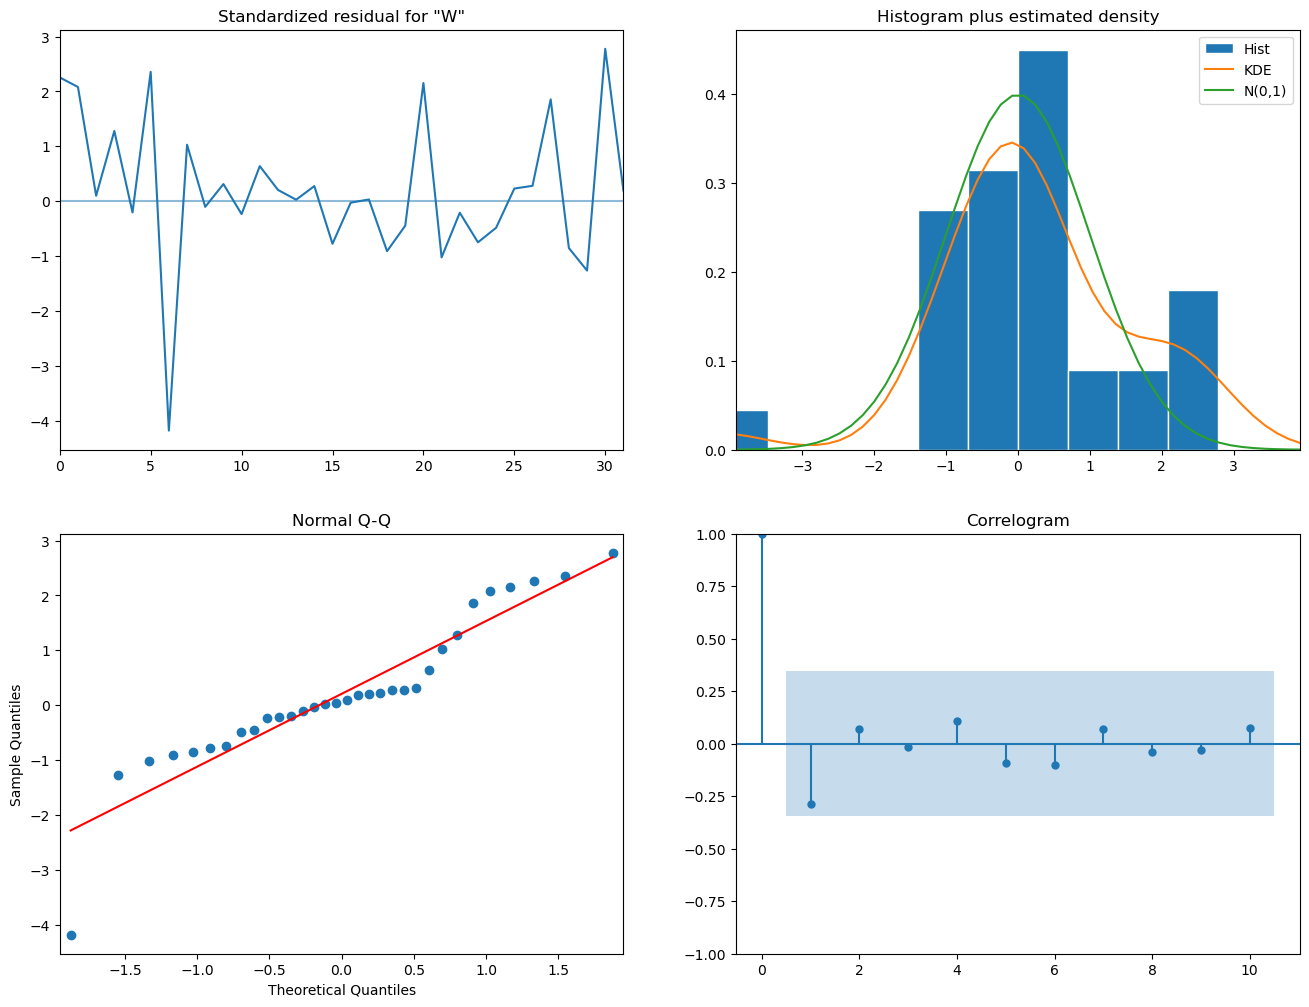

In [141]:
model_fit.plot_diagnostics(figsize=(16,12));

In [142]:
!pip install pmdarima

In [143]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -366.601
Date:                Sat, 30 Mar 2024   AIC                            747.202
Time:                        01:39:30   BIC                            757.462
Sample:                             0   HQIC                           750.603
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1290.3191   9763.187     -0.132      0.895   -2.04e+04    1.78e+04
ar.L1         -0.6922      0.136     -5.094      0.000      -0.959      -0.426
ma.L1          0.4265      0.506      0.842      0.400      -0.566       1.419
ma.L2         -0.3955      0.136     -2.913      0.004      -0.662      -0.129
ma.L3          0.3425      0.493      0.694      0.488      -0.625       1.310
ma.L4          0.8264      0.300      2.751      0.006       0.238       1.415
sigma2      4.488e+08      0.220   2.04e+09      0.000    4.49e+08    4.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.81   Prob(JB):                         0.75
Heteroskedasticity (H):               0.43   Skew:                             0.32
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.36e+24. Standard errors may be unstable.
"""

In [144]:
predictions_auto = auto_arima.predict(steps=len(test))

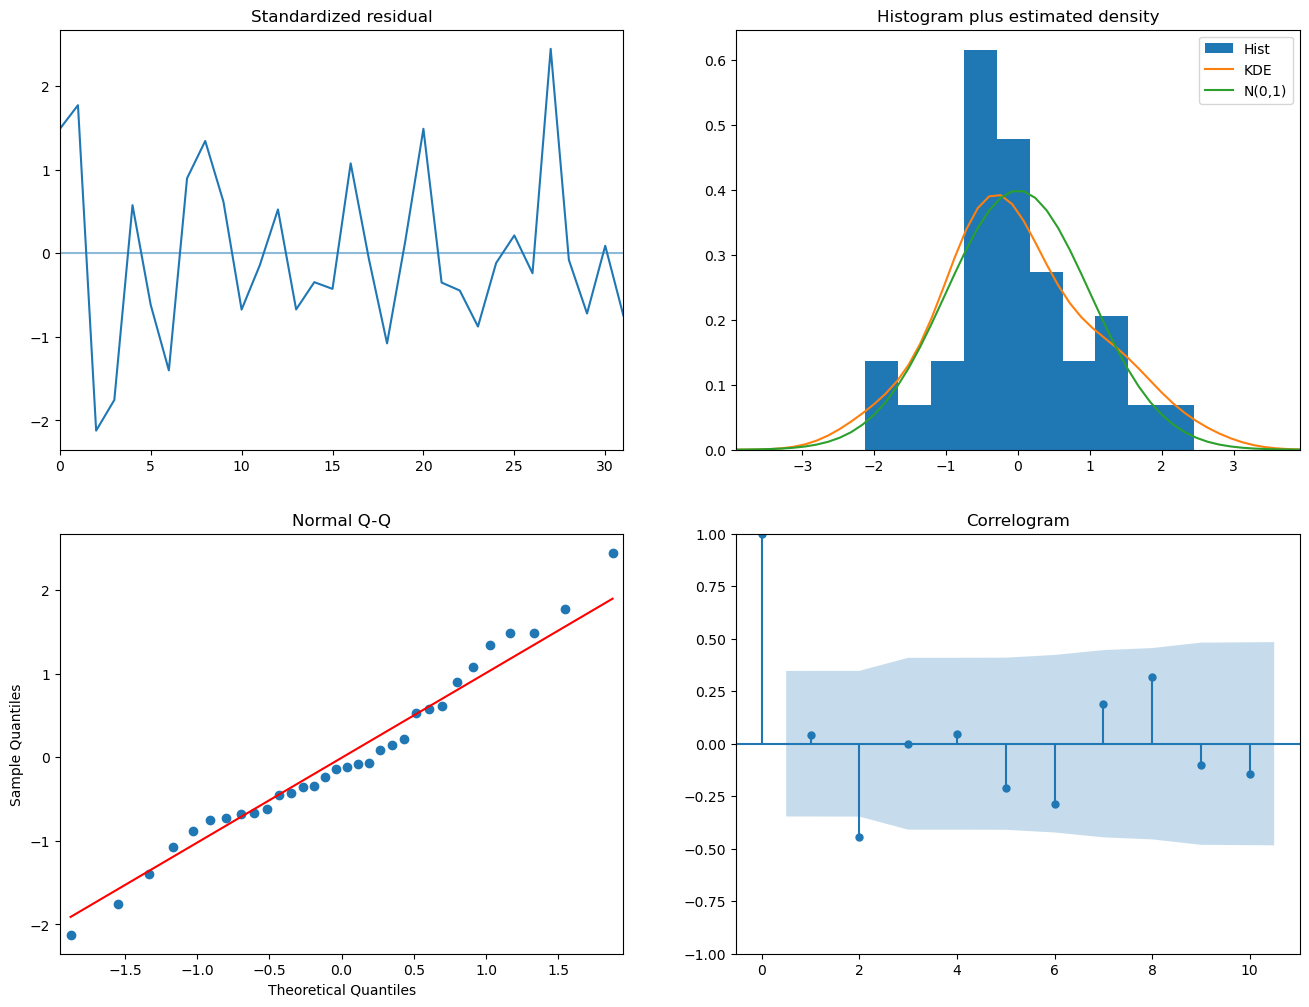

In [145]:
auto_arima.plot_diagnostics(figsize=(16,12));

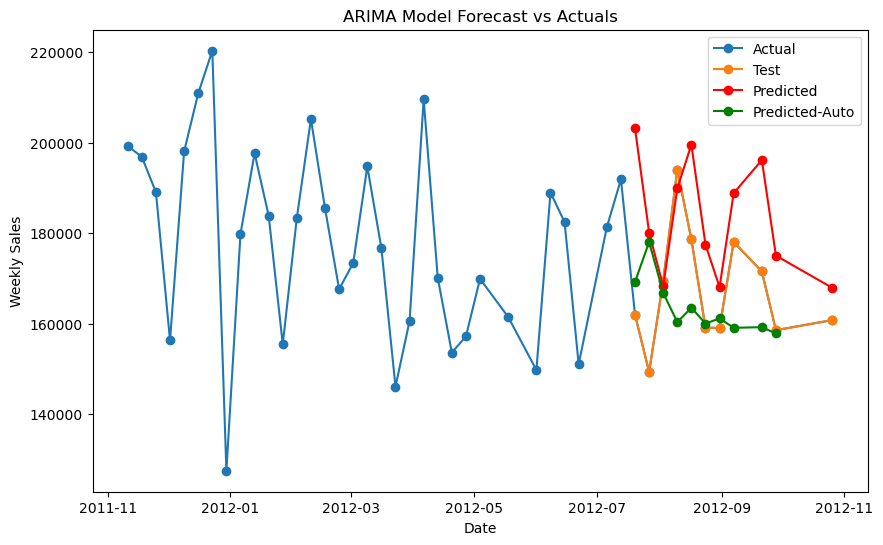

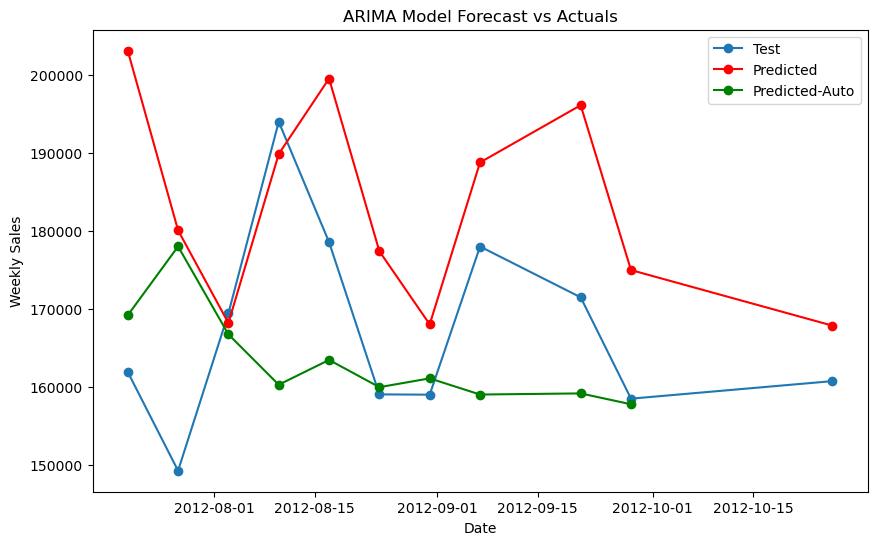

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.plot(test.index[:-1], predictions_auto, marker='o', color='green', label='Predicted-Auto')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.plot(test.index[:-1], predictions_auto, marker='o', color='green', label='Predicted-Auto')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Conclusions:

Looking at comparison to the test set, the auto ARIMA results are worse than the hand-tuned version

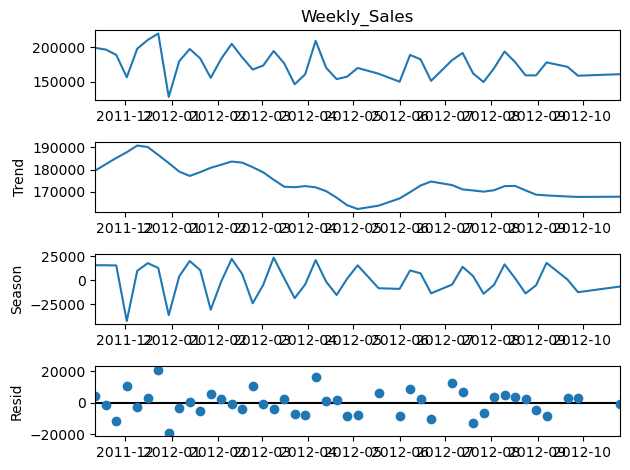

In [147]:
from statsmodels.tsa.seasonal import STL

res = STL(timeSeries,period=4).fit()

res.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

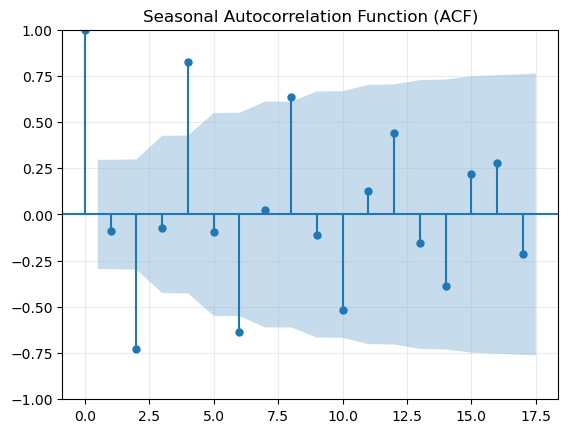

<Figure size 1000x600 with 0 Axes>

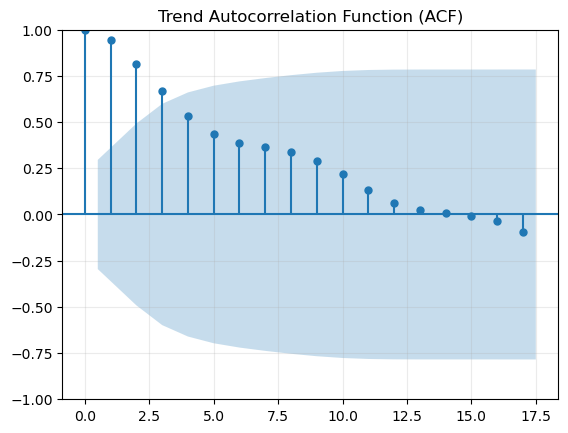

In [148]:
# Plot ACF for Seasonal and non-seasonal parts
plt.figure(figsize=(10, 6))
plot_acf(res.seasonal, alpha=0.05)
plt.title('Seasonal Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(res.trend, alpha=0.05)
plt.title('Trend Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

In [149]:
import itertools
import statsmodels.api as sm


p = q = range(0, 3)
d = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

pdqs = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=200, freq='W'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df

In [150]:
# To change frequency to match your time series data
sarimax_gridsearch(timeSeries, pdq, pdqs)

SARIMAX (0, 0, 0) x (0, 0, 0, 4) : BIC Calculated =1191.7803216293432
SARIMAX (0, 0, 0) x (0, 0, 1, 4) : BIC Calculated =1168.9878854457318
SARIMAX (0, 0, 0) x (0, 0, 2, 4) : BIC Calculated =1165.2861950312688
SARIMAX (0, 0, 0) x (0, 1, 0, 4) : BIC Calculated =896.1149213129972
SARIMAX (0, 0, 0) x (0, 1, 1, 4) : BIC Calculated =901.3319799062699
SARIMAX (0, 0, 0) x (0, 1, 2, 4) : BIC Calculated =908.1096192079178
SARIMAX (0, 0, 0) x (1, 0, 0, 4) : BIC Calculated =1007.7501795881831
SARIMAX (0, 0, 0) x (1, 0, 1, 4) : BIC Calculated =1006.8236210468866
SARIMAX (0, 0, 0) x (1, 0, 2, 4) : BIC Calculated =1010.526803892903
SARIMAX (0, 0, 0) x (1, 1, 0, 4) : BIC Calculated =901.8073986288665
SARIMAX (0, 0, 0) x (1, 1, 1, 4) : BIC Calculated =894.7069368380397
SARIMAX (0, 0, 0) x (1, 1, 2, 4) : BIC Calculated =896.1519874872373
SARIMAX (0, 0, 0) x (2, 0, 0, 4) : BIC Calculated =1004.1315081461197
SARIMAX (0, 0, 0) x (2, 0, 1, 4) : BIC Calculated =1009.3357450447256
SARIMAX (0, 0, 0) x (2, 0, 

,pdq,pdqs,bic
315,"(2, 1, 2)","(1, 1, 1, 4)",893.640852
10,"(0, 0, 0)","(1, 1, 1, 4)",894.706937
3,"(0, 0, 0)","(0, 1, 0, 4)",896.114921
11,"(0, 0, 0)","(1, 1, 2, 4)",896.151987
16,"(0, 0, 0)","(2, 1, 1, 4)",896.215360


                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 4)   Log Likelihood                -233.506
Date:                             Sat, 30 Mar 2024   AIC                            481.012
Time:                                     01:41:02   BIC                            488.324
Sample:                                          0   HQIC                           482.599
                                              - 33                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6590      0.882      0.747      0.455      -1.070       2.388
ar.L2         -0.0571      

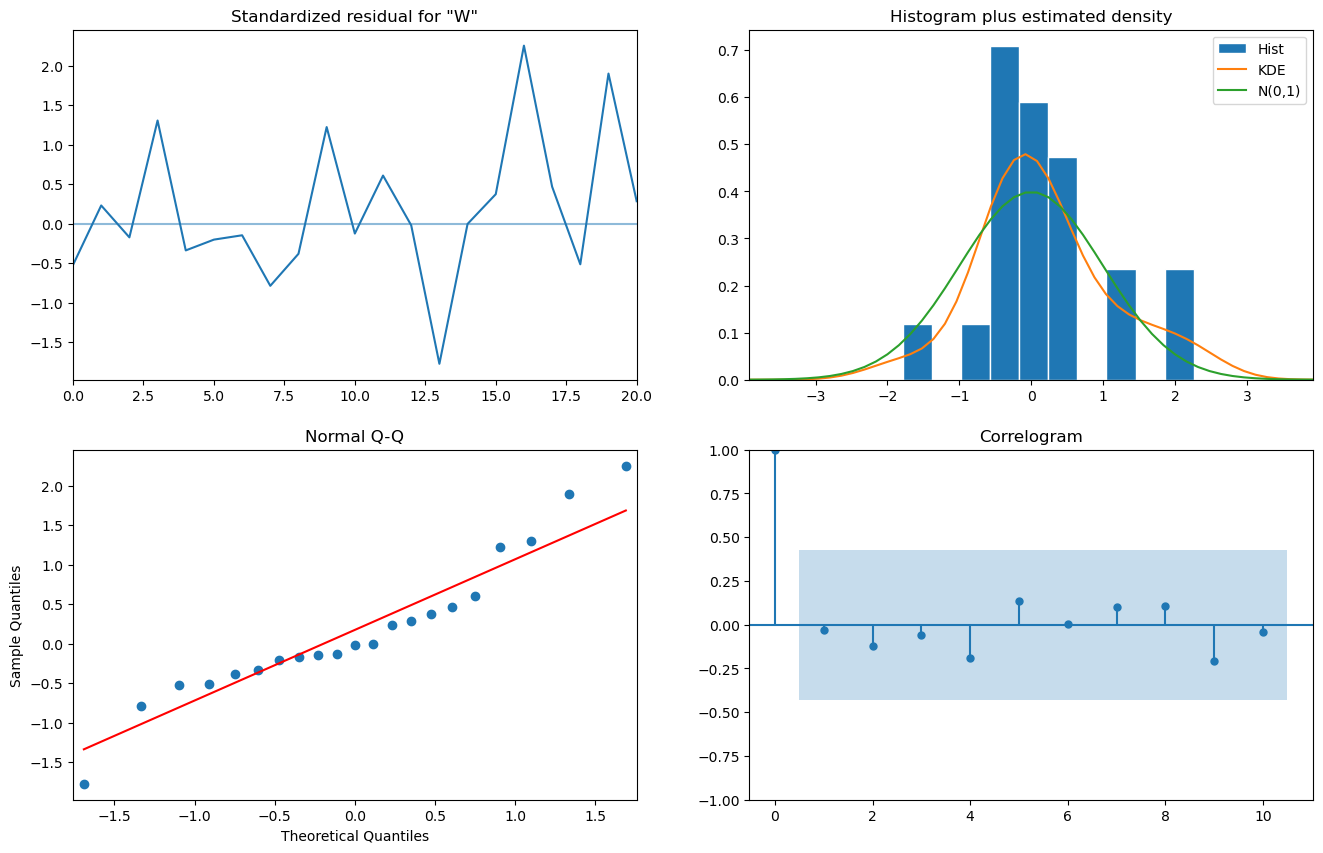

In [151]:
# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(train, 
                                    order=(2,1,2), 
                                    seasonal_order=(1,1,1,4), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False)
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

In [152]:
predictions_sarima = output.predict(start=33,end=43)

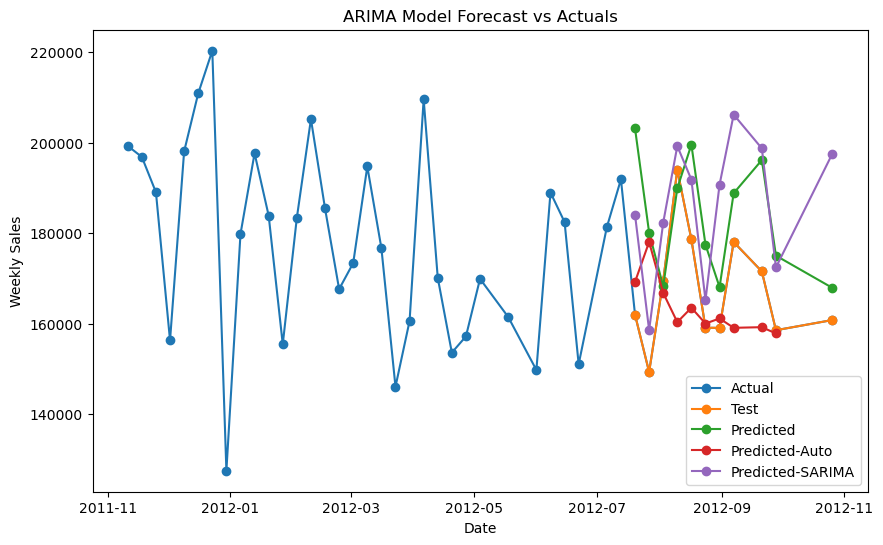

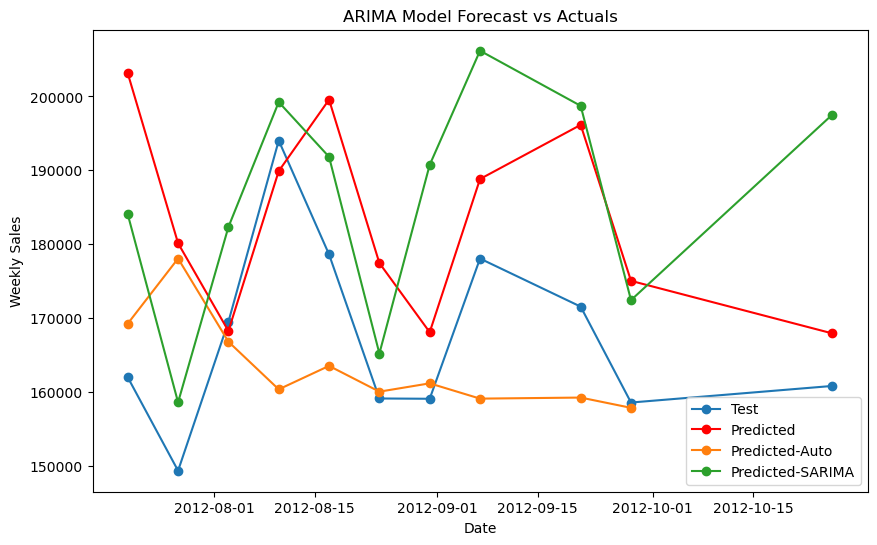

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', label='Predicted')
plt.plot(test.index[:-1], predictions_auto, marker='o', label='Predicted-Auto')
plt.plot(test.index, predictions_sarima, marker='o', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.plot(test.index[:-1], predictions_auto, marker='o', label='Predicted-Auto')
plt.plot(test.index, predictions_sarima, marker='o', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Interesting that the SARIMAX result looks a lot more similar to the hand tuned ARIMA and not like the automated ARIMA

In [154]:
# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
rmse_ar = np.sqrt(mse)
rmse_ar

20376.64634128399

In [155]:
# Step 5: Evaluate the model
mse = mean_squared_error(test[:-1], predictions_auto)
rmse_auto= np.sqrt(mse)
rmse_auto

16638.342421155547

In [156]:
# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse)
rmse_sarima

21441.84627168251

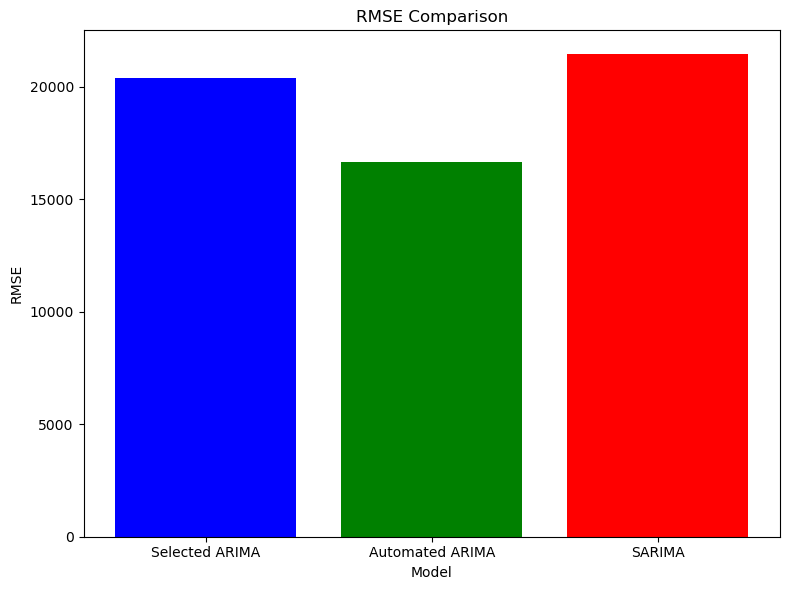

In [157]:
# Given values
values = [rmse_ar, rmse_auto, rmse_sarima]  # Example values for rise_ar, rmse_auto, rmse_sarima
labels = ['Selected ARIMA', 'Automated ARIMA', 'SARIMA']

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Display the plot
plt.tight_layout()
plt.show()

# However the auto tuned ARIMA has the least RMSE value

In [158]:
## To download the clean and Merged Data File

featSaleDF.to_csv('project_820_clean_data.csv', index=False)  

In [159]:
mergedDF.to_csv('project_820_clean_data_ALL.csv', index=False)  

In [160]:
display(mergedDF)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Lagged_Weekly_Sales
6587,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1.0,18689.54,A,151315,2011,November,NaN
6588,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2.0,44936.47,A,151315,2011,November,18689.54
6589,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3.0,9959.64,A,151315,2011,November,44936.47
6590,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4.0,36826.52,A,151315,2011,November,9959.64
6591,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5.0,31002.65,A,151315,2011,November,36826.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,93.0,2487.80,B,118221,2012,October,54608.75
423282,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,94.0,5203.31,B,118221,2012,October,2487.80
423283,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,95.0,56017.47,B,118221,2012,October,5203.31
423284,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,97.0,6817.48,B,118221,2012,October,56017.47


In [161]:
df.isna().sum()

Date            0
Weekly_Sales    0
Period          0
dtype: int64

In [162]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [163]:
sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64